# Import

In [4]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 


# sklearn preprocessing for dealing with categorical variables
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score,roc_auc_score,recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso

import mlflow
import mlflow.sklearn

from tqdm import tqdm

import h2o
from h2o.estimators import H2ORandomForestEstimator

import json


from xgboost import XGBClassifier

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')



# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
import mlflow.sklearn




import gc
import time
import warnings

from contextlib import contextmanager
from lightgbm import LGBMClassifier

In [4]:
# Checking the versions of the imported libraries


print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("mlflow version:", mlflow.__version__)


Numpy version: 2.1.3
Pandas version: 2.2.3
Scikit-learn version: 1.5.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
mlflow version: 2.17.2


# Données

Il y a un total de 9 fichiers : 1 fichier principal pour l'entraînement (avec la cible), 1 fichier principal pour le test (sans la cible), 1 fichier d'exemple de soumission et 6 autres fichiers contenant des informations supplémentaires sur chaque prêt.

Il existe 7 sources de données différentes :

application_train/application_test : les données principales d'entraînement et de test avec des informations sur chaque demande de prêt chez Home Credit. Chaque prêt a sa propre ligne et est identifié par la caractéristique SK_ID_CURR. Les données d'entraînement des demandes de prêt contiennent la variable TARGET indiquant 0 : le prêt a été remboursé ou 1 : le prêt n'a pas été remboursé.
bureau : des données concernant les crédits antérieurs des clients provenant d'autres institutions financières. Chaque crédit antérieur a sa propre ligne dans bureau, mais un prêt dans les données de demande peut avoir plusieurs crédits antérieurs.
bureau_balance : des données mensuelles sur les crédits antérieurs dans bureau. Chaque ligne correspond à un mois d'un crédit antérieur, et un crédit antérieur unique peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.
previous_application : des demandes antérieures de prêts chez Home Credit pour les clients ayant des prêts dans les données de demande. Chaque prêt actuel dans les données de demande peut avoir plusieurs prêts antérieurs. Chaque demande antérieure a une ligne et est identifiée par la caractéristique SK_ID_PREV.
POS_CASH_BALANCE : des données mensuelles sur les prêts précédents liés à un point de vente ou à des prêts en espèces que les clients ont contractés chez Home Credit. Chaque ligne correspond à un mois d'un prêt lié à un point de vente ou à un prêt en espèces, et un prêt antérieur unique peut avoir plusieurs lignes.
credit_card_balance : des données mensuelles sur les cartes de crédit que les clients ont eues chez Home Credit. Chaque ligne correspond à un mois du solde d'une carte de crédit, et une carte de crédit unique peut avoir plusieurs lignes.
installments_payment : l'historique des paiements pour les prêts antérieurs chez Home Credit. Il y a une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.

In [5]:
# List files available
print(os.listdir("C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
# Liste des noms de fichiers
file_names = [
    'application_test.csv',
    'application_train.csv',
    'bureau.csv',
    'bureau_balance.csv',
    'credit_card_balance.csv',
    'HomeCredit_columns_description.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv',
    'sample_submission.csv'
]

# Afficher la liste
print(file_names)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## import des données dans dans dataframe

bureau.csv

Tous les crédits précédents des clients fournis par d'autres institutions financières et reportés au Bureau de Crédit (pour les clients ayant un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que de crédits que le client avait au Bureau de Crédit avant la date de la demande.

In [7]:
df_bureau = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\bureau.csv')
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [8]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance.csv

Soldes mensuels des crédits précédents au Bureau de Crédit.
Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent reporté au Bureau de Crédit, c'est-à-dire que la table contient (# prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) lignes.



In [9]:
df_bureau_balance = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\bureau_balance.csv')
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


credit_card_balance.csv

Snapshots mensuels des soldes des cartes de crédit précédentes que le demandeur possède avec Home Credit.
Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts de notre échantillon, c'est-à-dire que la table contient (# prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois pour lesquels nous avons un historique observable pour la carte de crédit précédente) lignes.

In [10]:
df_credit_card = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\credit_card_balance.csv')
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

POS_CASH_balance.csv

Snapshots mensuels des soldes des prêts précédents en POS (point de vente) et des prêts en espèces que le demandeur avait avec Home Credit.
Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts de notre échantillon, c'est-à-dire que la table contient (# prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) lignes.

In [11]:
df_cash_balance = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\POS_CASH_balance.csv')
df_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


HomeCredit_columns_description.csv

Ce fichier contient des descriptions pour les colonnes dans les différents fichiers de données.

In [12]:
df_home_credit = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\HomeCredit_columns_description.csv', encoding='latin1')
df_home_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


installments_payments.csv

Historique des remboursements pour les crédits précédemment déboursés chez Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement qui a été effectué, plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un paiement d'une échéance OU une échéance correspondant à un paiement d'un précédent crédit Home Credit lié aux prêts de notre échantillon.



In [13]:
df_payments = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\installments_payments.csv', encoding='latin1')
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


previous_application.csv

Toutes les demandes précédentes de prêts Home Credit des clients ayant des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [14]:
df_previous = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\previous_application.csv', encoding='latin1')
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
df_cash_balance = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\POS_CASH_balance.csv', encoding='latin1')
df_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [16]:

df_previous = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\previous_application.csv', encoding='latin1')
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Training et Test Data

In [17]:
# Training data
app_train = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Le jeu de données Test comporte 307 511 obeservations sur 122 variables incluant la cible à prédire (Target)

In [17]:
# Testing data features
app_test = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


le jeu test est plus petit et n'a pas la colonne Target

# Exploration des données

L'analyse exploratoire des données (EDA) est un processus ouvert où nous calculons des statistiques et réalisons des graphiques pour trouver des tendances, des anomalies, des motifs ou des relations au sein des données. L'objectif de l'EDA est d'apprendre ce que nos données peuvent nous dire. Cela commence généralement par une vue d'ensemble à un niveau élevé, puis se concentre sur des domaines spécifiques à mesure que nous découvrons des zones intéressantes dans les données. Les résultats peuvent être intéressants en soi, ou ils peuvent être utilisés pour éclairer nos choix de modélisation, par exemple en nous aidant à décider quelles caractéristiques utiliser.

## Examen de la colonne Target

In [18]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

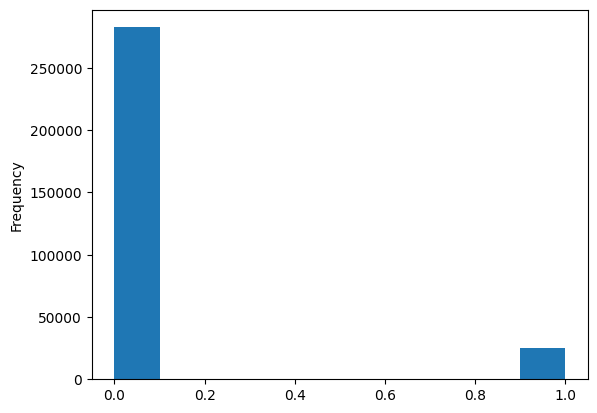

In [19]:
app_train['TARGET'].astype(int).plot.hist();

Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui ne l'ont pas été

## Examen des données manquantes

In [20]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


Lorsque viendra le moment de construire nos modèles de machine learning, nous devrons remplir ces valeurs manquantes (connues sous le nom d'imputation). Dans un travail ultérieur, nous utiliserons des modèles tels que XGBoost qui peuvent gérer les valeurs manquantes sans avoir besoin d'imputation. Une autre option serait de supprimer les colonnes avec un pourcentage élevé de valeurs manquantes, bien qu'il soit impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle. Par conséquent, nous conserverons toutes les colonnes pour le moment.

## Types des colonnes

In [22]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

les colonnes float64 et int64 sont des colonnes numériques. Les colonnes object comporte du texte et sont des catégories

In [23]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

la plupart des colonnes ont peut de valeurs disctinctes, il est donc possible d'utiliser ces informations.

## Encoding des variables catégorielles

Un modèle de machine learning ne peut pas traiter directement des variables de catégories. Il faut au préalable encoder ces variables pour pouvoir les utiliser dans les algorithmes

Nous allons utiliser un traitement Label Encoding pour les variables avec deux catégories. Pour les autres varaibles, un traitement de One Hot Encoding sera préféré pour ne pas biaiser le modèle de machine Learning car il n'y a de relation linéraire entre les différentes catégories

In [24]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [25]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Alignement des données Tests et Train

les doonnées train et test n'ont pas le même nombre de variable par catégories. Pour supprimer les types d'éléments  présents dans le jeu de données Train mais absents du jeu de données Test, il y a besoin d'aligner les dataframes.

Pour aligner les deux dataframe, il faut supprimer la colonne Target du jeu de données Train parcequ'elle n'est pas dans le jeu de données Test.

In [26]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Analyse Exploratoire

Anomalies:


Un problème que nous voulons toujours surveiller lors de l'EDA (Analyse Exploratoire des Données) est la présence d'anomalies dans les données. Celles-ci peuvent être dues à des erreurs de saisie de chiffres, à des erreurs dans les équipements de mesure, ou elles peuvent être des mesures valides mais extrêmes. Une façon de quantifier les anomalies est d'examiner les statistiques d'une colonne en utilisant la méthode describe. 

Les nombres dans la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt actuelle. Pour voir ces statistiques en années, nous pouvons multiplier par -1 et diviser par le nombre de jours dans une année.

In [27]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

il n'y a pas d'incohérence dans les données

In [28]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

il y a un problème sur ces données, le maximum représente plus de 1 000 ans

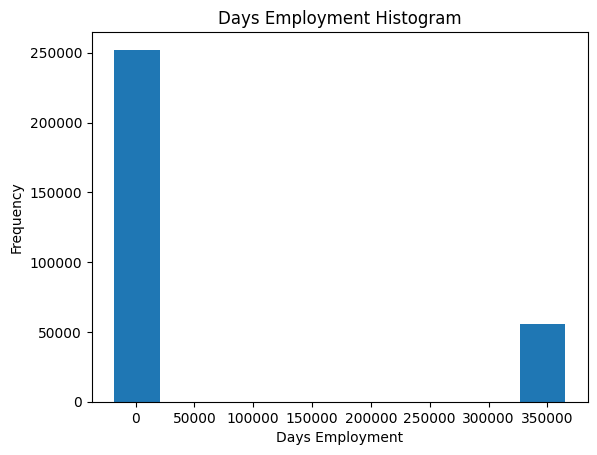

In [29]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [30]:
# étude du résultat finales sur les données en anomalie

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


 les anomalies ont un taux de défaut plus bas.

puisque toutes les anomalies ont la même valeur exacte, nous voulons les remplir avec la même valeur au cas où tous ces prêts auraient quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, donc nous voulons indiquer au modèle de machine learning si nous avons effectivement rempli ces valeurs. Comme solution, nous allons remplir les valeurs anormales avec une valeur non numérique (np.nan) puis créer une nouvelle colonne booléenne indiquant si la valeur était anormale ou non.

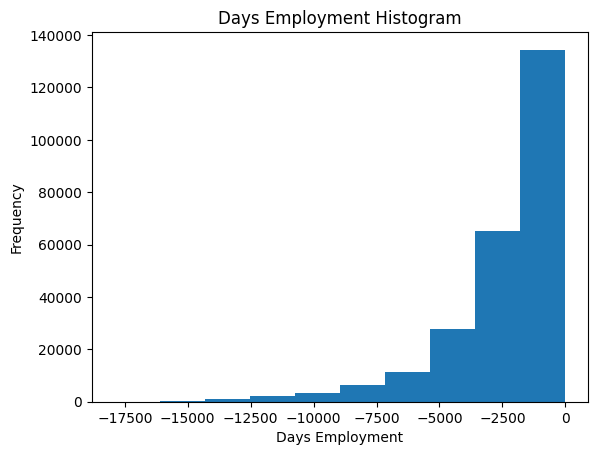

In [31]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

La distribution semble beaucoup plus conforme à nos attentes, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient à l'origine anormales (car nous devrons remplir les nans avec une certaine valeur, probablement la médiane de la colonne). Les autres colonnes avec "DAYS" dans le DataFrame semblent correspondre à nos attentes, sans valeurs aberrantes évidentes.

Il est extrêmement important de noter que tout ce que nous faisons aux données d'entraînement, nous devons également le faire aux données de test. Assurons-nous de créer la nouvelle colonne et de remplir la colonne existante avec np.nan dans les données de test.

In [32]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Etude des corrélations

Nous calculons le coefficient de corrélation de Pearson entre chaque variable et la variable cible

In [33]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Nous voyons que DAYS_BIRTH représente l'âge en jours du client au moment du prêt, exprimé en jours négatifs (pour une raison quelconque !). La corrélation est positive, mais la valeur de cette caractéristique est en réalité négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire que la cible == 0). C'est un peu déroutant, donc nous allons prendre la valeur absolue de la caractéristique et ensuite la corrélation sera négative.

In [34]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982709)

la corrélation est négative, plus le client est vieux, plus il va rembourser à temps son prêt

### Variable Age des clients

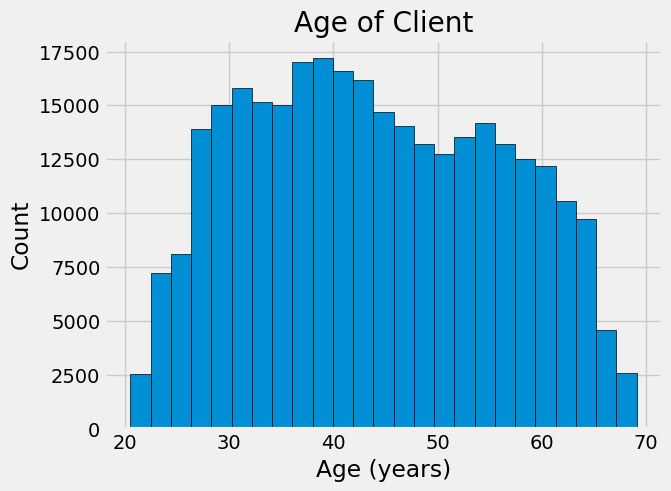

In [35]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

À lui seul, la distribution des âges ne nous dit pas grand-chose, si ce n'est qu'il n'y a pas d'outliers, car tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite réaliser un graphique d'estimation de la densité par noyau (KDE) coloré selon la valeur de la cible. Un graphique d'estimation de la densité par noyau montre la distribution d'une seule variable et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement un gaussien, à chaque point de données, puis en moyennant tous les noyaux individuels pour développer une seule courbe lisse). Nous utiliserons le kdeplot de seaborn pour ce graphique.

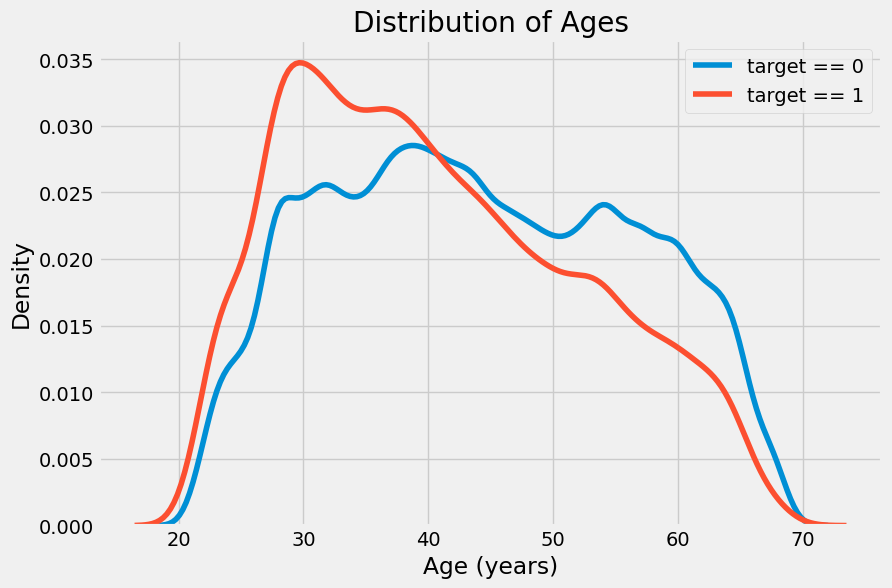

In [36]:
plt.figure(figsize = (9, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');plt.legend()

La courbe correspondant à target == 1 est biaisée vers le jeune âge de la plage. Cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte le résultat. Examinons cette relation d'une autre manière : le taux moyen de défaut de remboursement des prêts par tranche d'âge.

Pour réaliser ce graphique, nous découpons d'abord la catégorie d'âge en intervalles de 5 ans. Ensuite, pour chaque intervalle, nous calculons la valeur moyenne de la cible, ce qui nous indique le ratio de prêts qui n'ont pas été remboursés dans chaque catégorie d'âge.

In [37]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [38]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


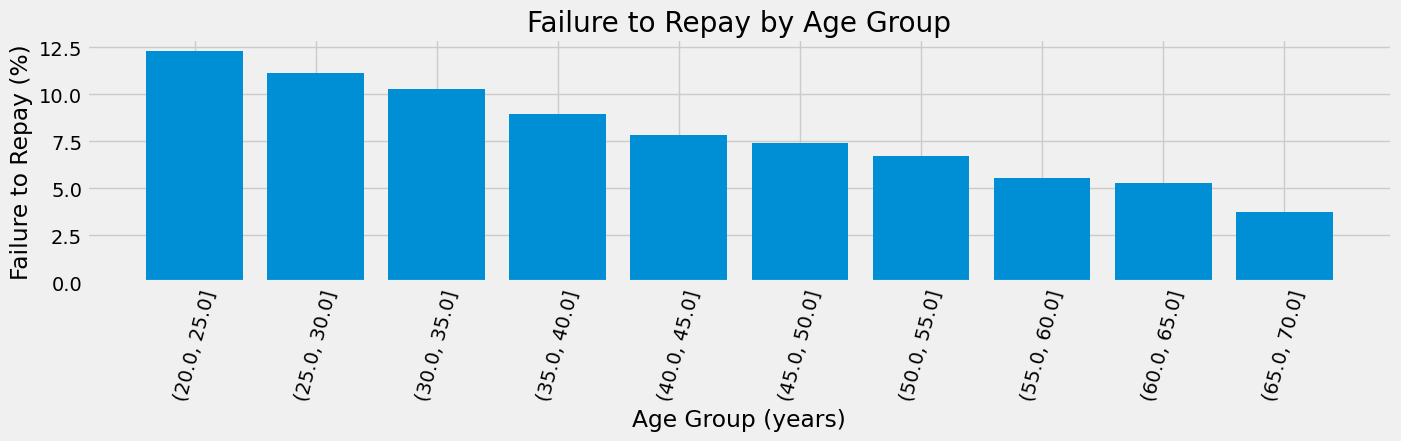

In [39]:
plt.figure(figsize = (15, 3))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Il existe une tendance claire : les demandeurs plus jeunes sont plus susceptibles de ne pas rembourser le prêt ! Le taux de défaut de remboursement est supérieur à 10 % pour les trois groupes d'âge les plus jeunes et en dessous de 5 % pour le groupe d'âge le plus âgé.

Cette information pourrait être directement utilisée par la banque : parce que les clients plus jeunes sont moins susceptibles de rembourser le prêt, peut-être devraient-ils bénéficier de plus de conseils ou de conseils en matière de planification financière. Cela ne signifie pas que la banque devrait discriminer les clients plus jeunes, mais il serait judicieux de prendre des mesures de précaution pour aider les clients plus jeunes à rembourser à temps

### Variable Exterior Source

Les 3 variables ayant les plus fortes corrélations négatives avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un "score normalisé provenant d'une source de données externe"

Examinons ces variables.

Tout d'abord, nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [40]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


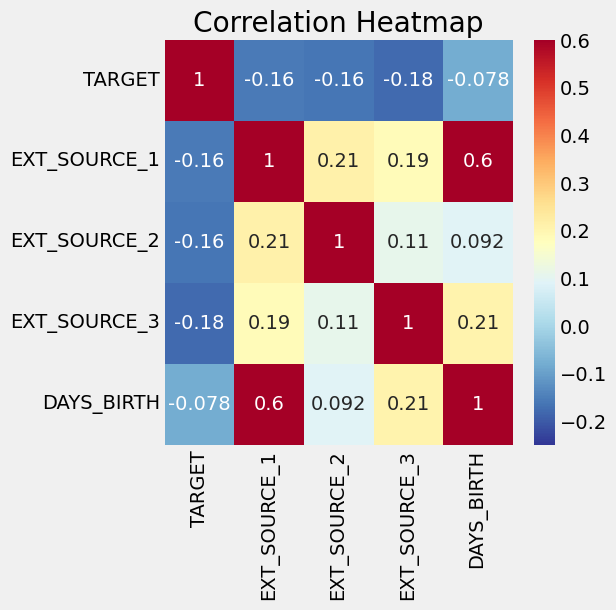

In [41]:
plt.figure(figsize = (5, 5))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, indiquant qu'à mesure que la valeur de l'EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que peut-être l'un des facteurs de ce score est l'âge du client.

Ensuite, nous pouvons examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

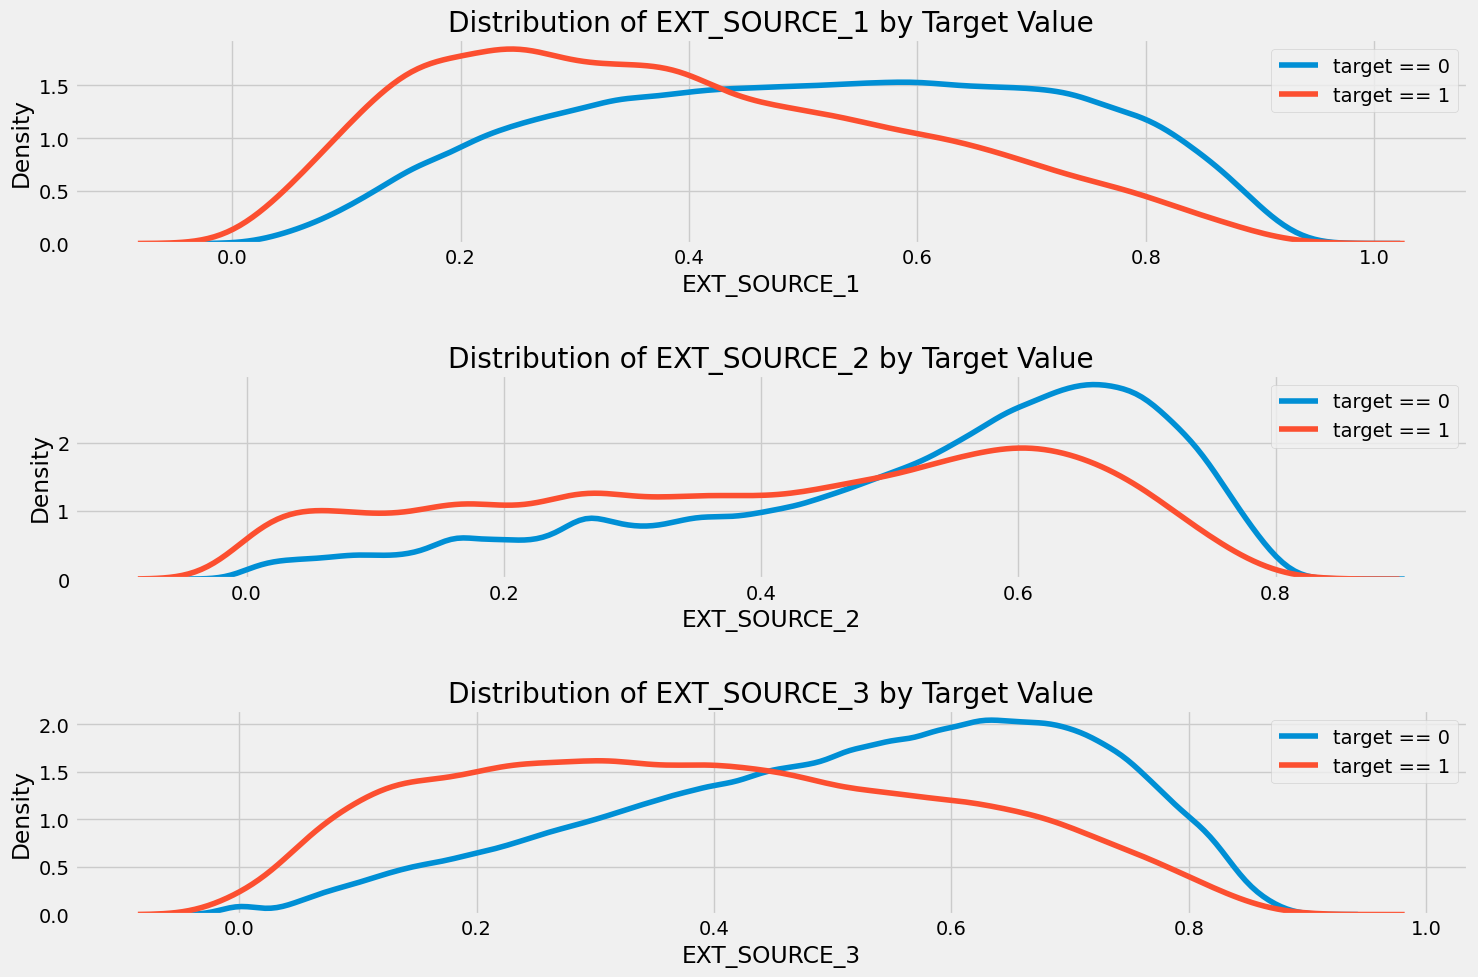

In [42]:
plt.figure(figsize = (15, 10))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
    

EXT_SOURCE_3 présente la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un candidat rembourse un prêt. La relation n'est pas très forte (en fait, elles sont toutes considérées comme très faibles), mais ces variables seront tout de même utiles pour un modèle d'apprentissage automatique afin de prédire si un candidat remboursera ou non un prêt à temps.

En tant que dernier graphique exploratoire, nous pouvons réaliser un pairs plot des variables EXT_SOURCE et de la variable DAYS_BIRTH. Le Pairs Plot est un excellent outil d'exploration, car il nous permet de visualiser les relations entre plusieurs paires de variables ainsi que les distributions de variables individuelles. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer un Pairs Plot avec des nuages de points dans la partie supérieure, des histogrammes sur la diagonale, et des graphiques de densité par noyau en 2D ainsi que des coefficients de corrélation dans la partie inférieure

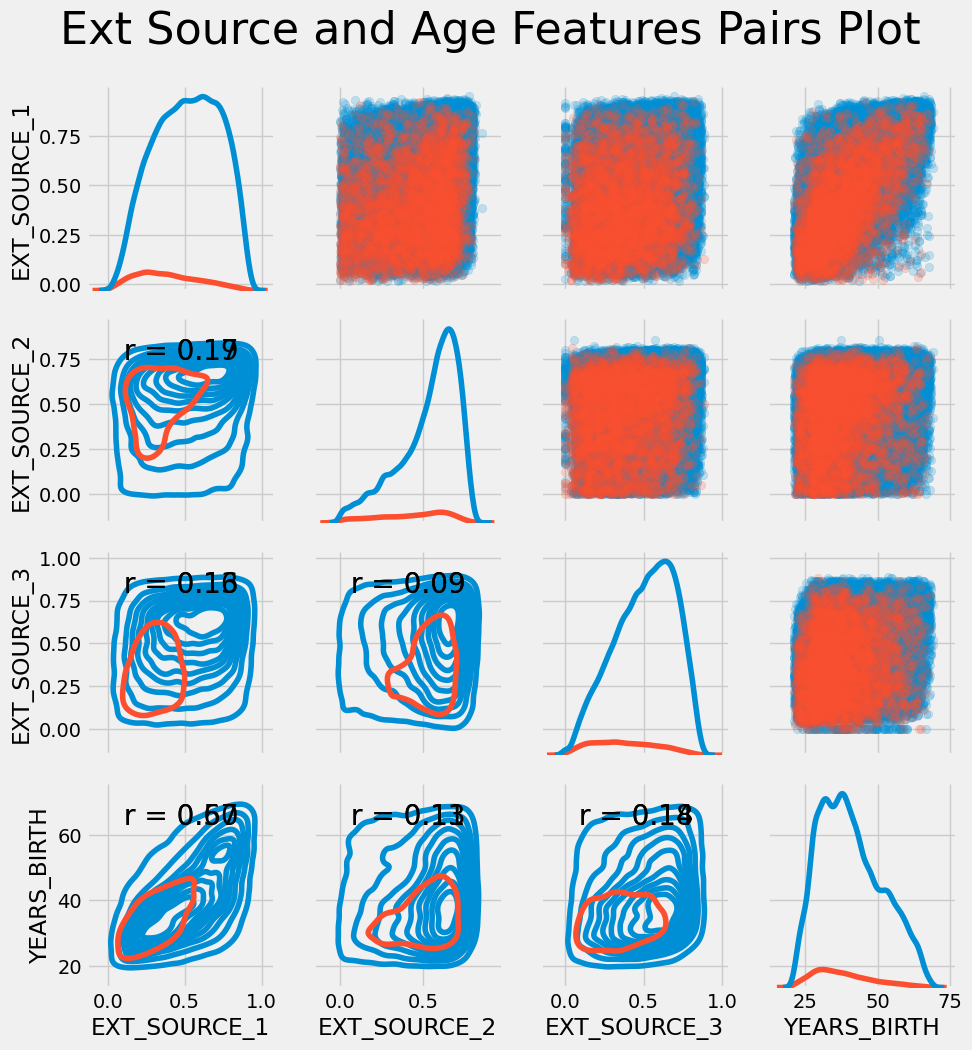

In [43]:
# Copy the data for plotting
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().iloc[:50000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}",
                xy=(.2, .8), xycoords=ax.transAxes,
                size=20)

# Create the pairgrid object
grid = sns.PairGrid(data=plot_data, diag_sharey=False, hue='TARGET',
                    vars=[x for x in plot_data.columns if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha=0.2)

# Diagonal is a kde plot (density estimate)
grid.map_diag(sns.kdeplot)

# Bottom is density plot with correlation
grid.map_lower(sns.kdeplot, cmap='OrRd_r')

# Add the correlation coefficient annotation
grid.map_lower(corr_func)

# Adjust title and layout
plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)
plt.show()

### Durée Emploi the style of plots


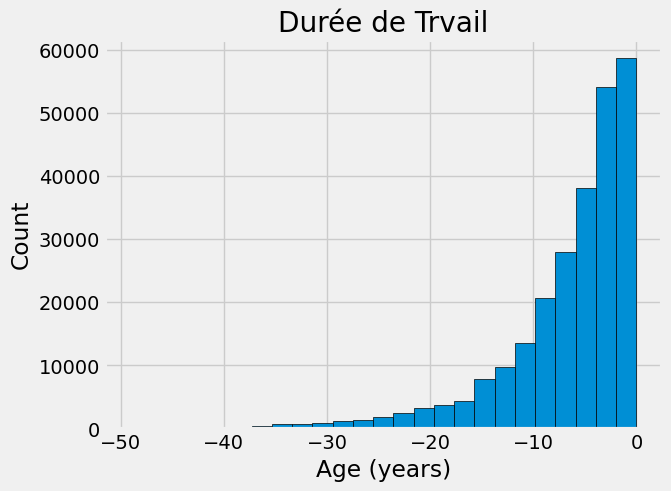

In [44]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('Durée de Trvail'); plt.xlabel('Age (years)'); plt.ylabel('Count');

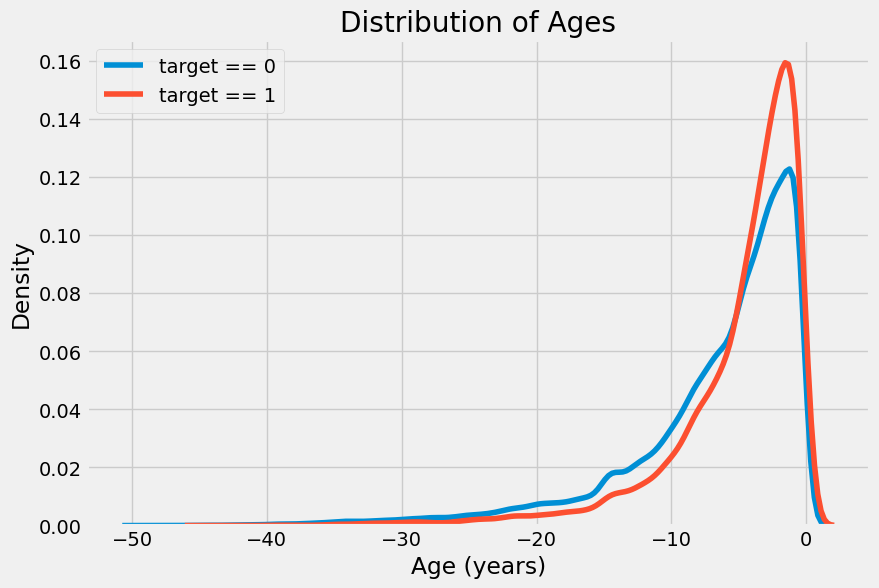

In [45]:
plt.figure(figsize = (9, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');plt.legend()

# Feature Engineering

## Data Train

In [5]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    
    # Nombre de colonnes supprimées (colonnes catégorielles remplacées par les dummies)
    nb_columns_removed = len(categorical_columns)

    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns,nb_columns_removed

In [6]:
# Preprocess application_train.csv and application_test.csv
def application_train(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\application_train.csv', nrows= num_rows)
    ##test_df = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\application_test.csv', nrows= num_rows)
    print("Train samples: {}".format(len(df)))
    print("taille du df initial: {}".format(df.shape)) 
    #df = pd.concat([df, test_df], ignore_index=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    binary_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
    for bin_feature in binary_cols:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols,nb_suppr_cols = one_hot_encoder(df, nan_as_category=True)
    print("Nouvelles colonnes créés encoder: {}".format(len(cat_cols)))
    print("Anciennes colonnes supprimées: {}".format(nb_suppr_cols))

    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    print("Nouvelles colonnes créés ratio: {}".format(5))

    # Identify non-categorical columns
    encoded_columns = binary_cols + cat_cols
    # Use set operations to exclude 'SK_ID_CURR' and 'TARGET'
    non_categorical_cols = df.columns.difference(set(encoded_columns).union({'SK_ID_CURR', 'TARGET'}))

    # Create a copy of the original DataFrame before scaling
    df_init = df.copy()


    # Scale non-categorical columns
    scaler = StandardScaler()
    df[non_categorical_cols] = scaler.fit_transform(df[non_categorical_cols])
        
    gc.collect()

    # sauvegarder les colonnes encodées
    encoded_columns = binary_cols + cat_cols
    
    return df, encoded_columns,df_init
    
    


In [7]:
df_data,col_encod,df_init=application_train(num_rows = None, nan_as_category = False)

Train samples: 307511
taille du df initial: (307511, 122)
Nouvelles colonnes créés encoder: 146
Anciennes colonnes supprimées: 13
Nouvelles colonnes créés ratio: 5


In [8]:
print(col_encod)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_TYPE_nan', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_nan', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_nan', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_nan', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separate

In [9]:
df_data.shape

(307507, 260)

In [10]:
df_init.shape

(307507, 260)

In [11]:
# Calcul du ratio de NaN par colonne
nan_ratio = df_data.isna().sum() / len(df_data)

# Trier les colonnes par ratio de NaN en ordre décroissant et afficher les 10 premières
top_10_nan_ratio_columns = nan_ratio.sort_values(ascending=False).head(10)

# Afficher le ratio de NaN par colonne
print("Top 10 des colonnes avec le plus grand ratio de NaN :")
print(top_10_nan_ratio_columns)




Top 10 des colonnes avec le plus grand ratio de NaN :
COMMONAREA_MEDI             0.698722
COMMONAREA_MODE             0.698722
COMMONAREA_AVG              0.698722
NONLIVINGAPARTMENTS_AVG     0.694332
NONLIVINGAPARTMENTS_MODE    0.694332
NONLIVINGAPARTMENTS_MEDI    0.694332
LIVINGAPARTMENTS_MEDI       0.683552
LIVINGAPARTMENTS_MODE       0.683552
LIVINGAPARTMENTS_AVG        0.683552
FLOORSMIN_AVG               0.678489
dtype: float64


In [12]:
columns_with_nan = [col for col in df_data if df_data[col].isnull().any()]
print("Colonnes avec NaN :", columns_with_nan)

Colonnes avec NaN : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 

In [13]:
len(columns_with_nan)

66

In [14]:
print(df_data[columns_with_nan].dtypes)

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
DAYS_EMPLOYED                 float64
OWN_CAR_AGE                   float64
CNT_FAM_MEMBERS               float64
                               ...   
AMT_REQ_CREDIT_BUREAU_YEAR    float64
DAYS_EMPLOYED_PERC            float64
INCOME_PER_PERSON             float64
ANNUITY_INCOME_PERC           float64
PAYMENT_RATE                  float64
Length: 66, dtype: object


In [15]:
# Dictionnaire pour stocker les corrélations
correlations_no_nan = {}

# Parcourir les colonnes avec des NaN
for col in columns_with_nan:
    # Filtrer les lignes où TARGET et la colonne ne sont pas NaN
    valid_rows = df_data[[col, 'TARGET']].dropna()
    
    # Calculer la corrélation sur les valeurs valides
    if not valid_rows.empty:  # S'assurer qu'il y a des données restantes
        corr = valid_rows[col].corr(valid_rows['TARGET'])
        correlations_no_nan[col] = corr

# Afficher les résultats
print(correlations_no_nan)


{'AMT_ANNUITY': np.float64(-0.012818497233817406), 'AMT_GOODS_PRICE': np.float64(-0.03964669449611345), 'DAYS_EMPLOYED': np.float64(0.0749565854167729), 'OWN_CAR_AGE': np.float64(0.03761091578035143), 'CNT_FAM_MEMBERS': np.float64(0.009310394410156566), 'EXT_SOURCE_1': np.float64(-0.155317098139625), 'EXT_SOURCE_2': np.float64(-0.16047133438888211), 'EXT_SOURCE_3': np.float64(-0.17892627567610384), 'APARTMENTS_AVG': np.float64(-0.029501600758440865), 'BASEMENTAREA_AVG': np.float64(-0.022746816751439587), 'YEARS_BEGINEXPLUATATION_AVG': np.float64(-0.009727353375310914), 'YEARS_BUILD_AVG': np.float64(-0.022149831310469246), 'COMMONAREA_AVG': np.float64(-0.018551216655351244), 'ELEVATORS_AVG': np.float64(-0.03420227894417578), 'ENTRANCES_AVG': np.float64(-0.019175379208600532), 'FLOORSMAX_AVG': np.float64(-0.0440085385476082), 'FLOORSMIN_AVG': np.float64(-0.03361890633762634), 'LANDAREA_AVG': np.float64(-0.010887101502953918), 'LIVINGAPARTMENTS_AVG': np.float64(-0.025034189019725598), 'LI

In [16]:
# Compter le nombre de colonnes avec des NaN
nan_columns_count = df_data.isna().any().sum()

# Afficher le résultat
print(f"Nombre de colonnes avec des NaN : {nan_columns_count}")


Nombre de colonnes avec des NaN : 66


In [17]:
# Compter le nombre de NaN par colonne
nan_counts = df_data.isna().sum()

# Trier les colonnes par le nombre de NaN de manière décroissante
top_50_nan_columns = nan_counts.sort_values(ascending=False).head(50)

# Afficher les 15 colonnes avec le plus de NaN
print(top_50_nan_columns)

COMMONAREA_MEDI                 214862
COMMONAREA_MODE                 214862
COMMONAREA_AVG                  214862
NONLIVINGAPARTMENTS_AVG         213512
NONLIVINGAPARTMENTS_MODE        213512
NONLIVINGAPARTMENTS_MEDI        213512
LIVINGAPARTMENTS_MEDI           210197
LIVINGAPARTMENTS_MODE           210197
LIVINGAPARTMENTS_AVG            210197
FLOORSMIN_AVG                   208640
FLOORSMIN_MODE                  208640
FLOORSMIN_MEDI                  208640
YEARS_BUILD_MEDI                204486
YEARS_BUILD_MODE                204486
YEARS_BUILD_AVG                 204486
OWN_CAR_AGE                     202927
LANDAREA_MEDI                   182588
LANDAREA_AVG                    182588
LANDAREA_MODE                   182588
BASEMENTAREA_AVG                179942
BASEMENTAREA_MODE               179942
BASEMENTAREA_MEDI               179942
EXT_SOURCE_1                    173376
NONLIVINGAREA_MEDI              169680
NONLIVINGAREA_AVG               169680
NONLIVINGAREA_MODE       

In [18]:
# Calculer le ratio de NaN par ligne
df_data['nan_ratio'] = df_data.isnull().mean(axis=1)

# Trier les lignes par le ratio de NaN (du plus grand au plus petit)
top_20_nan_rows = df_data.sort_values(by='nan_ratio', ascending=False).head(20)

# Afficher les 20 lignes avec le plus grand ratio de NaN
print(top_20_nan_rows[['nan_ratio']])


        nan_ratio
133770   0.223077
116937   0.223077
269492   0.223077
185713   0.223077
172595   0.219231
258474   0.219231
53941    0.219231
54457    0.219231
115346   0.215385
7077     0.215385
36899    0.215385
127942   0.215385
244833   0.215385
109581   0.215385
87399    0.215385
241006   0.215385
260125   0.215385
215458   0.215385
201306   0.215385
48839    0.215385


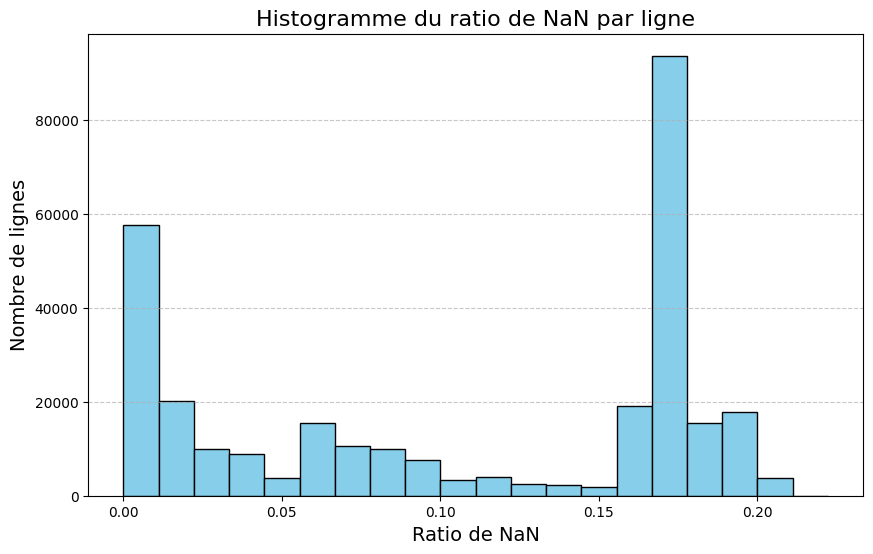

In [19]:
import matplotlib.pyplot as plt

# Calculer le ratio de NaN par ligne
df_data['nan_ratio'] = df_data.isnull().mean(axis=1)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df_data['nan_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme du ratio de NaN par ligne', fontsize=16)
plt.xlabel('Ratio de NaN', fontsize=14)
plt.ylabel('Nombre de lignes', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Compter les lignes sans aucun NaN
rows_without_nan = df_data.dropna(how='any').shape[0]

print(f"Nombre de lignes sans NaN : {rows_without_nan}")


Nombre de lignes sans NaN : 10745


In [21]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,nan_ratio
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,False,True,False,False,-0.670404,0.193663,1.079115,-0.623356,0.313781,0.003831
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,False,True,False,False,-0.643949,-0.375908,0.413262,-0.515092,-1.160818,0.007663
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,True,False,False,True,-1.086102,0.197531,-0.252591,-0.855743,-0.164361,0.168582
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,True,False,False,True,0.022805,0.063157,-0.252591,0.412049,1.834693,0.199234
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,True,False,False,True,-0.033258,-0.320572,0.280091,-0.010235,-0.492509,0.176245


In [22]:
print(df_data.columns.tolist())

['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMEN

In [23]:
 # Remplacer les caractères spéciaux par des underscores
df_data.columns = df_data.columns.str.replace(r'\W+', '_', regex=True) 

In [24]:
df_clé_target = df_data[['SK_ID_CURR', 'TARGET']]

In [25]:
df_clé_target.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [26]:
df_clé_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   SK_ID_CURR  307507 non-null  int64
 1   TARGET      307507 non-null  int64
dtypes: int64(2)
memory usage: 7.0 MB


In [27]:
# Afficher les valeurs uniques de la colonne TARGET
valeurs_uniques = df_clé_target['TARGET'].unique()
print(valeurs_uniques)

[1 0]


## Data Bureau and Balance

In [28]:
import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import StandardScaler

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows=None, nan_as_category=True):
    bureau = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\bureau.csv', nrows=num_rows)
    bb = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\bureau_balance.csv', nrows=num_rows)

    print("taille du df bureau initial: {}".format(bureau.shape))
    print("taille du df bb: {}".format(bb.shape))      
    
    # One-hot encoding for categorical variables
    bb, bb_cat,bb_suppr_cols = one_hot_encoder(bb, nan_as_category=True)
    bureau, bureau_cat,bureau_suppr_cols = one_hot_encoder(bureau, nan_as_category=True)
    print("Nouvelles colonnes bb créés encoder: {}".format(len(bb_cat)))
    print("Anciennes colonnes bb supprimées: {}".format(bb_suppr_cols))
    print("Nouvelles colonnes bureau créés encoder: {}".format(len(bureau_cat)))
    print("Anciennes colonnes bb supprimées: {}".format(bureau_suppr_cols))
    
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    
    # Merge aggregated bureau balance data
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace=True)
    
    # Garbage collection
    del bb, bb_agg
    gc.collect()

    # Bureau and bureau_balance numeric features aggregations
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat:
        cat_aggregations[cat] = ['mean']
    for cat in bb_cat:
        cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

    # Identify non-categorical columns
    encoded_columns = bb_cat + bureau_cat
    # Exclure explicitement 'SK_ID_CURR' des colonnes à scaler
    non_categorical_cols = bureau_agg.columns.difference(encoded_columns).difference(['SK_ID_CURR'])

 
    # Scale non-categorical columns
    scaler = StandardScaler()
    bureau_agg[non_categorical_cols] = scaler.fit_transform(bureau_agg[non_categorical_cols])
    
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')

    # Garbage collection
    del active, active_agg
    gc.collect()
    
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')

    # Après la jointure, réinitialiser l'index de bureau_agg pour récupérer 'SK_ID_CURR' comme colonne
    bureau_agg = bureau_agg.reset_index()

    # Cleanup
    del closed, closed_agg, bureau
    gc.collect()

    print("taille du df bureau_agg: {}".format(bureau_agg.shape))  
    
    return bureau_agg



In [29]:
df_bureau=bureau_and_balance(num_rows = None, nan_as_category = True)

taille du df bureau initial: (1716428, 17)
taille du df bb: (27299925, 3)
Nouvelles colonnes bb créés encoder: 9
Anciennes colonnes bb supprimées: 1
Nouvelles colonnes bureau créés encoder: 26
Anciennes colonnes bb supprimées: 3
taille du df bureau_agg: (305811, 117)


In [30]:
df_bureau.shape

(305811, 117)

In [31]:
print(df_bureau["SK_ID_CURR"])

0         100001
1         100002
2         100003
3         100004
4         100005
           ...  
305806    456249
305807    456250
305808    456253
305809    456254
305810    456255
Name: SK_ID_CURR, Length: 305811, dtype: int64


In [32]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 261 entries, SK_ID_CURR to nan_ratio
dtypes: bool(146), float64(110), int64(5)
memory usage: 315.0 MB


In [33]:
print(df_data["SK_ID_CURR"])

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307507, dtype: int64


In [34]:
# Mettre 'SK_ID_CURR' en index de df_bureau
df_bureau.set_index('SK_ID_CURR', inplace=True)
# Faire la jointure
df_data = df_data.join(df_bureau, how='left', on='SK_ID_CURR')

In [35]:
df_data.shape

(307507, 377)

In [36]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,0.0,0.0,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,90.0
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0


## Data Previous

In [37]:
# Preprocess previous_applications.csv
def previous_applications(num_rows=None, nan_as_category=True):
    prev = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\previous_application.csv', nrows=num_rows)
    prev, cat_cols,prev_suppr_cols = one_hot_encoder(prev, nan_as_category=nan_as_category)

    # Remplacer les valeurs 365.243 par NaN
    days_columns = [
        'DAYS_FIRST_DRAWING', 
        'DAYS_FIRST_DUE', 
        'DAYS_LAST_DUE_1ST_VERSION', 
        'DAYS_LAST_DUE', 
        'DAYS_TERMINATION'
    ]
    for col in days_columns:
        prev[col].replace(365243, np.nan, inplace=True)

    # Ajouter une nouvelle fonctionnalité : pourcentage de demande / valeur reçue
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']

    # Agrégations pour les caractéristiques numériques
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }

    # Agrégations pour les caractéristiques catégorielles
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    # Agrégation des données
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

    # Traitement des valeurs infinies
    prev_agg.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Imputation des valeurs manquantes
    prev_agg.fillna(prev_agg.mean(), inplace=True)

    # Identifier les colonnes non catégorielles à mettre à l'échelle
    encoded_columns = pd.Index(cat_cols)  # Convertir en Index
    non_categorical_cols = prev_agg.columns.difference(encoded_columns).difference(['SK_ID_CURR'])  # Exclure SK_ID_CURR
    

    # Mise à l'échelle des colonnes numériques
    scaler = StandardScaler()
    prev_agg[non_categorical_cols] = scaler.fit_transform(prev_agg[non_categorical_cols])

    # Applications précédentes : applications approuvées - uniquement les caractéristiques numériques
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

    # Applications précédentes : applications refusées - uniquement les caractéristiques numériques
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')

    # Nettoyage de la mémoire
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()

    return prev_agg


In [38]:
df_previous=previous_applications(num_rows = None, nan_as_category = True)

In [39]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338857 entries, 100001 to 456255
Columns: 249 entries, PREV_AMT_ANNUITY_MIN to REFUSED_CNT_PAYMENT_SUM
dtypes: float64(249)
memory usage: 646.3 MB


In [40]:
df_previous.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,REFUSED_HOUR_APPR_PROCESS_START_MAX,REFUSED_HOUR_APPR_PROCESS_START_MEAN,REFUSED_RATE_DOWN_PAYMENT_MIN,REFUSED_RATE_DOWN_PAYMENT_MAX,REFUSED_RATE_DOWN_PAYMENT_MEAN,REFUSED_DAYS_DECISION_MIN,REFUSED_DAYS_DECISION_MAX,REFUSED_DAYS_DECISION_MEAN,REFUSED_CNT_PAYMENT_MEAN,REFUSED_CNT_PAYMENT_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-0.521455,-1.038592,-1.061302,-0.205543,-0.835933,-0.849415,-0.253118,-0.859038,-0.888254,0.714990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,0.176212,-0.763233,-0.535781,1.443758,-0.470430,0.161104,1.356782,-0.519619,0.052874,0.589114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,-0.154732,3.865523,4.153787,0.264737,1.238222,1.841035,0.205860,1.353425,1.902399,0.214515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,-0.336370,-0.965542,-0.921886,-0.211463,-0.837245,-0.853041,-0.291285,-0.867085,-0.910566,1.182243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,-0.407975,-0.993804,-0.975823,-0.471147,-0.789050,-0.865971,-0.499755,-0.823261,-0.910743,0.906593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 377 entries, SK_ID_CURR to CLOSED_MONTHS_BALANCE_SIZE_SUM
dtypes: bool(146), float64(226), int64(5)
memory usage: 587.1 MB


In [42]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,0.0,0.0,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,90.0
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [43]:
df_data = df_data.join(df_previous, how='left', on='SK_ID_CURR')

In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 626 entries, SK_ID_CURR to REFUSED_CNT_PAYMENT_SUM
dtypes: bool(146), float64(475), int64(5)
memory usage: 1.1 GB


249 colonnes ont été rajoutées aux 376 colonnes avant jointure, portant le total de colonnes à 625

In [45]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REFUSED_HOUR_APPR_PROCESS_START_MAX,REFUSED_HOUR_APPR_PROCESS_START_MEAN,REFUSED_RATE_DOWN_PAYMENT_MIN,REFUSED_RATE_DOWN_PAYMENT_MAX,REFUSED_RATE_DOWN_PAYMENT_MEAN,REFUSED_DAYS_DECISION_MIN,REFUSED_DAYS_DECISION_MAX,REFUSED_DAYS_DECISION_MEAN,REFUSED_CNT_PAYMENT_MEAN,REFUSED_CNT_PAYMENT_SUM
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,15.0,15.0,NaN,NaN,NaN,-181.0,-181.0,-181.0,48.0,48.0
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pos_Cash_Balance

In [46]:

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows=None, nan_as_category=True):
    pos = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\POS_CASH_balance.csv', nrows=num_rows)
    pos, cat_cols,pos_suppr_cols = one_hot_encoder(pos, nan_as_category=nan_as_category)

    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    
    # Compter les comptes de POS Cash
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    
    # Traitement des valeurs infinies
    pos_agg.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Imputation des valeurs manquantes
    pos_agg.fillna(pos_agg.mean(), inplace=True)

   # Identify columns that should not be scaled (categorical + SK_ID_CURR)
    encoded_columns = cat_cols  # Assuming cat_cols contains all categorical columns
    non_categorical_cols = pos_agg.columns.difference(encoded_columns).difference(['SK_ID_CURR'])  # Exclure SK_ID_CURR

    # Scale non-categorical columns
    if len(non_categorical_cols) > 0:
        scaler = StandardScaler()
        pos_agg[non_categorical_cols] = scaler.fit_transform(pos_agg[non_categorical_cols])
   
    # Nettoyage de la mémoire
    del pos
    gc.collect()

    return pos_agg


In [47]:
df_Pos_Cash=pos_cash(num_rows = None, nan_as_category = True)

In [48]:
df_Pos_Cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337252 entries, 100001 to 456255
Data columns (total 18 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   POS_MONTHS_BALANCE_MAX                               337252 non-null  float64
 1   POS_MONTHS_BALANCE_MEAN                              337252 non-null  float64
 2   POS_MONTHS_BALANCE_SIZE                              337252 non-null  float64
 3   POS_SK_DPD_MAX                                       337252 non-null  float64
 4   POS_SK_DPD_MEAN                                      337252 non-null  float64
 5   POS_SK_DPD_DEF_MAX                                   337252 non-null  float64
 6   POS_SK_DPD_DEF_MEAN                                  337252 non-null  float64
 7   POS_NAME_CONTRACT_STATUS_Active_MEAN                 337252 non-null  float64
 8   POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN         3

In [49]:
df_Pos_Cash.head()

,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100001,-2.166834,-2.025893,-0.841982,-0.054803,-0.058919,0.170907,0.040747,-1.671362,-0.006811,-0.07909,-0.004447,2.149856,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-0.841982
100002,0.621581,1.089243,-0.434350,-0.101056,-0.071944,-0.045562,-0.016634,1.272378,-0.006811,-0.07909,-0.004447,-1.299165,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-0.434350
100003,-0.290016,-0.593215,-0.067481,-0.101056,-0.071944,-0.045562,-0.016634,0.326176,-0.006811,-0.07909,-0.004447,-0.190551,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-0.067481
100004,-0.611756,0.317375,-1.045798,-0.101056,-0.071944,-0.045562,-0.016634,-2.039329,-0.006811,-0.07909,-0.004447,2.580984,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-1.045798
100005,-0.129146,0.591264,-0.760456,-0.101056,-0.071944,-0.045562,-0.016634,-1.136136,-0.006811,-0.07909,-0.004447,0.111798,-0.023745,-0.080317,2.463988,-0.002435,0.0,-0.760456


In [50]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 626 entries, SK_ID_CURR to REFUSED_CNT_PAYMENT_SUM
dtypes: bool(146), float64(475), int64(5)
memory usage: 1.1 GB


In [51]:
df_data = df_data.join(df_Pos_Cash, how='left', on='SK_ID_CURR')

In [52]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 644 entries, SK_ID_CURR to POS_COUNT
dtypes: bool(146), float64(493), int64(5)
memory usage: 1.2 GB


In [53]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,-0.006811,-0.07909,-0.004447,-1.299165,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-0.434350
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,-0.006811,-0.07909,-0.004447,-0.190551,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-0.067481
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,-0.006811,-0.07909,-0.004447,2.580984,-0.023745,-0.080317,-0.325603,-0.002435,0.0,-1.045798
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,-0.006811,-0.07909,-0.004447,0.178987,-0.023745,4.477998,-0.325603,-0.002435,0.0,-0.352824
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,-0.006811,-0.07909,-0.004447,-0.593683,-0.023745,-0.080317,0.139329,-0.002435,0.0,1.481520


18 colonnes ont été rajoutées aux 625 colonnes avant jointure, portant le total de colonnes à 643

## installments_payments

In [54]:
# Preprocess installments_payments.csv
def installments_payments(num_rows=None, nan_as_category=True):
    ins = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\installments_payments.csv', nrows=num_rows)
    ins, cat_cols,ins_suppr_ = one_hot_encoder(ins, nan_as_category=nan_as_category)

    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)

    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    
    for cat in cat_cols:
        aggregations[cat] = ['mean']
        
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    
    # Compter les comptes d'installations
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    
    # Traitement des valeurs infinies
    ins_agg.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Imputation des valeurs manquantes
    ins_agg.fillna(ins_agg.mean(), inplace=True)

    # Identify columns that should not be scaled (categorical + SK_ID_CURR)
    encoded_columns = cat_cols  # Assuming cat_cols contains all categorical columns
    non_categorical_cols = ins_agg.columns.difference(encoded_columns).difference(['SK_ID_CURR'])  # Exclure SK_ID_CURR

    # Scale non-categorical columns
    if len(non_categorical_cols) > 0:
        scaler = StandardScaler()
        ins_agg[non_categorical_cols] = scaler.fit_transform(ins_agg[non_categorical_cols])

    # Nettoyage de la mémoire
    del ins
    gc.collect()

    return ins_agg


In [55]:
df_installments=installments_payments(num_rows = None, nan_as_category = True)

In [56]:
df_installments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339587 entries, 100001 to 456255
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE  339587 non-null  float64
 1   INSTAL_DPD_MAX                         339587 non-null  float64
 2   INSTAL_DPD_MEAN                        339587 non-null  float64
 3   INSTAL_DPD_SUM                         339587 non-null  float64
 4   INSTAL_DBD_MAX                         339587 non-null  float64
 5   INSTAL_DBD_MEAN                        339587 non-null  float64
 6   INSTAL_DBD_SUM                         339587 non-null  float64
 7   INSTAL_PAYMENT_PERC_MAX                339587 non-null  float64
 8   INSTAL_PAYMENT_PERC_MEAN               339587 non-null  float64
 9   INSTAL_PAYMENT_PERC_SUM                339587 non-null  float64
 10  INSTAL_PAYMENT_PERC_VAR                339587 non-null  

In [57]:
# Vérication du scaling
df_installments.describe()

,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
count,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,...,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05,3.395870e+05
mean,6.277120e-19,-1.435368e-17,1.565095e-17,4.509064e-18,-1.091800e-16,-6.266239e-16,3.250502e-17,-2.050526e-18,8.369493e-20,1.713654e-17,...,6.412078e-17,1.404819e-16,4.930677e-17,1.464190e-16,1.469474e-16,5.049943e-17,-1.155199e-16,4.306941e-16,-3.151114e-17,7.833845e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.967871e-01,-1.648012e-01,-1.165298e-01,-1.267300e-01,-1.314663e+00,-1.337809e+00,-9.635196e-01,-1.522459e-02,-3.612569e-02,-6.049779e-02,...,-7.933402e-01,-7.646663e-01,-3.643667e-01,-5.609558e-01,-7.531860e-01,-7.417520e-01,-5.103780e+00,-3.598461e+00,-9.855180e+00,-9.515573e-01
25%,-6.967871e-01,-1.648012e-01,-1.165298e-01,-1.267300e-01,-5.177767e-01,-6.101580e-01,-6.353299e-01,-1.464365e-02,-1.425025e-02,-4.632020e-02,...,-4.567772e-01,-6.116704e-01,-3.615019e-01,-5.032888e-01,-4.526722e-01,-5.986633e-01,-1.089895e-01,-6.529607e-01,-1.362852e-01,-6.836129e-01
50%,-1.622004e-01,-1.555654e-01,-1.124777e-01,-1.236702e-01,-2.405987e-01,-2.350615e-01,-3.095895e-01,-1.464365e-02,-1.267522e-02,-3.138814e-02,...,-2.509949e-01,-3.903625e-01,-2.040565e-01,-4.125925e-01,-2.615599e-01,-3.928372e-01,4.902365e-01,1.934037e-01,3.670293e-01,-3.669512e-01
75%,3.723863e-01,-8.167854e-02,-5.980068e-02,-6.553333e-02,1.751684e-01,3.123513e-01,2.855603e-01,-1.464365e-02,-1.267522e-02,-2.430275e-04,...,1.291021e-01,1.954778e-01,1.293841e-01,-2.020323e-02,1.046485e-01,1.710574e-01,5.628135e-01,8.175770e-01,6.202869e-01,2.663721e-01
max,3.030924e+01,2.647140e+01,2.137959e+02,2.537080e+02,1.091754e+02,3.079161e+01,2.482386e+01,2.313232e+02,2.983281e+02,2.297411e+02,...,1.059437e+02,3.559143e+01,1.723844e+02,1.454604e+01,9.851326e+01,3.437417e+01,6.093373e-01,1.539077e+00,7.404352e-01,8.085479e+00


In [58]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 644 entries, SK_ID_CURR to POS_COUNT
dtypes: bool(146), float64(493), int64(5)
memory usage: 1.2 GB


In [59]:
df_data = df_data.join(df_installments, how='left', on='SK_ID_CURR')

In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 670 entries, SK_ID_CURR to INSTAL_COUNT
dtypes: bool(146), float64(519), int64(5)
memory usage: 1.2 GB


In [61]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,-0.300725,-0.518829,0.273755,-0.348285,-0.295056,-0.505823,0.520012,1.015910,0.635042,-0.513103
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,1.966278,1.047403,0.095198,1.685515,1.813278,0.997287,-0.401159,-0.775695,0.131375,-0.366951
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,-0.490926,-0.740837,0.005138,-0.518602,-0.471946,-0.718883,-0.741713,0.268647,0.700251,-0.902840
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,1.889248,0.362686,-0.193113,2.210052,1.741640,0.340166,0.588867,1.089249,0.664006,-0.586179
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,-0.253540,0.171090,-0.364354,-0.470115,-0.269104,0.124218,0.585145,-0.184447,-0.457671,0.631751


26 colonnes ont été rajoutées aux 643 colonnes avant jointure, portant le total de colonnes à 669

## Credit_Card 

In [62]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import gc

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows=None, nan_as_category=True):
    cc = pd.read_csv('C:\\Users\\svenn\\Projet 7\\Projet+Mise+en+prod+-+home-credit-default-risk\\credit_card_balance.csv', nrows=num_rows)
    cc, cat_cols,cc_suppr = one_hot_encoder(cc, nan_as_category=True)
    
    # Drop SK_ID_PREV
    cc.drop(['SK_ID_PREV'], axis=1, inplace=True)

    # General aggregations
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()

    # Identify columns that should not be scaled (categorical + SK_ID_CURR)
    encoded_columns = cat_cols  # Assuming cat_cols contains all categorical columns
    non_categorical_cols = cc_agg.columns.difference(encoded_columns).difference(['SK_ID_CURR'])  # Exclure SK_ID_CURR
    

    # Scale non-categorical columns
    if len(non_categorical_cols) > 0:
        scaler = StandardScaler()
        cc_agg[non_categorical_cols] = scaler.fit_transform(cc_agg[non_categorical_cols])


    del cc
    gc.collect()

    return cc_agg


In [63]:
df_credit_card=credit_card_balance(num_rows = None, nan_as_category = True)

In [64]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103558 entries, 100006 to 456250
Columns: 141 entries, CC_MONTHS_BALANCE_MIN to CC_COUNT
dtypes: float64(141)
memory usage: 112.2 MB


In [65]:
df_credit_card.head()

,CC_MONTHS_BALANCE_MIN,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_MONTHS_BALANCE_SUM,CC_MONTHS_BALANCE_VAR,CC_AMT_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_BALANCE_VAR,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,0.944723,0.706254,0.960343,0.722047,-0.721041,-0.23791,-0.830574,-0.650688,-0.661302,-0.378995,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,-0.928329
100011,-1.122404,-0.654635,-1.139679,-0.899577,0.867060,-0.23791,0.272594,-0.144053,0.571896,-0.066339,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,1.102524
100013,-1.751530,0.706254,-1.739685,-1.935742,1.951743,-0.23791,0.111614,-0.481817,-0.128050,-0.253060,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,1.759564
100021,0.585223,-0.654635,0.570339,0.636608,-0.644923,-0.23791,-0.830574,-0.650688,-0.661302,-0.378995,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,-0.599809
100023,0.794931,-3.376414,0.720341,0.699684,-0.712391,-0.23791,-0.830574,-0.650688,-0.661302,-0.378995,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,-0.868598


In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 670 entries, SK_ID_CURR to INSTAL_COUNT
dtypes: bool(146), float64(519), int64(5)
memory usage: 1.2 GB


In [67]:
df_data = df_data.join(df_credit_card, how='left', on='SK_ID_CURR')

In [68]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Columns: 811 entries, SK_ID_CURR to CC_COUNT
dtypes: bool(146), float64(660), int64(5)
memory usage: 1.6 GB


In [69]:
df_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1,0,0,0,-0.577534,0.142129,-0.478099,-0.166152,-0.507239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,0,1,-0.577534,0.426790,1.725436,0.592657,1.599967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,0,1,0,-0.577534,-0.427192,-1.152889,-1.404649,-1.091897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,0,0,-0.577534,-0.142532,-0.711433,0.177858,-0.653403,...,-0.223551,-0.11553,-0.083913,-0.148232,0.0,0.0,0.0,0.0,0.0,-0.928329
4,100007,0,0,0,0,-0.577534,-0.199464,-0.213740,-0.361753,-0.068745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Calculer la proportion de NaN par colonne
nan_proportion = df_data.isna().mean()

# Afficher les résultats
print(nan_proportion)

SK_ID_CURR                          0.000000
TARGET                              0.000000
CODE_GENDER                         0.000000
FLAG_OWN_CAR                        0.000000
FLAG_OWN_REALTY                     0.000000
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.717389
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.717389
CC_NAME_CONTRACT_STATUS_nan_SUM     0.717389
CC_NAME_CONTRACT_STATUS_nan_VAR     0.719444
CC_COUNT                            0.717389
Length: 811, dtype: float64


In [71]:
# Compter le nombre de colonnes avec des NaN
nan_columns_count = df_data.isna().any().sum()

# Afficher le résultat
print(f"Nombre de colonnes avec des NaN : {nan_columns_count}")

Nombre de colonnes avec des NaN : 616


141 colonnes ont été rajoutées aux 669 colonnes avant jointure, portant le total de colonnes à 810

In [72]:
# Vérifier les valeurs infinies
infinity_mask = (df_data == np.inf) | (df_data == -np.inf)

# Afficher les colonnes contenant des valeurs infinies
infinite_columns = infinity_mask.any()

for col in df_data.columns[infinite_columns]:
    col_index = df_data.columns.get_loc(col)
    print(f"Colonne: {col}, Numéro dans le DataFrame initial: {col_index}")

# Créer df_data2 en supprimant les colonnes contenant des valeurs infinies
df_data2 = df_data.loc[:, ~infinite_columns]

Colonne: REFUSED_APP_CREDIT_PERC_MAX, Numéro dans le DataFrame initial: 606
Colonne: REFUSED_APP_CREDIT_PERC_MEAN, Numéro dans le DataFrame initial: 607


In [73]:
df_data2.shape

(307507, 809)

In [74]:
# Calcul de la moyenne et de l'écart-type
means = df_data2.mean()
stds = df_data2.std()

# Par exemple, ne vérifier que les colonnes numériques
numeric_columns = df_data2.select_dtypes(include=['float64', 'int64']).columns

# Afficher les colonnes dont la moyenne n'est pas 0 ou l'écart-type n'est pas 1
columns_to_check = []

# Seuils de tolérance pour la comparaison
tolerance_mean = 1e-1  # Tolérance pour la moyenne proche de 0
tolerance_std = 1e-1   # Tolérance pour l'écart-type proche de 1

for col in numeric_columns:
    if abs(means[col]) > tolerance_mean or abs(stds[col] - 1) > tolerance_std:
        columns_to_check.append(col)

# Afficher les colonnes qui ne respectent pas les critères
print("Colonnes avec moyenne différente de 0 ou écart-type différent de 1 :")
print(columns_to_check)

Colonnes avec moyenne différente de 0 ou écart-type différent de 1 :
['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'nan_ratio', 'BURO_AMT_ANNUITY_MAX', 'BURO_AMT_ANNUITY_MEAN', 'BURO_MONTHS_BALANCE_MAX_MAX', 'BURO_MONTHS_BALANCE_SIZE_MEAN', 'BURO_MONTHS_BALANCE_SIZE_SUM', 'BURO_CREDIT_ACTIVE_Bad debt_MEAN', 'BURO_CREDIT_ACTIVE_nan_MEAN', 'BURO_CREDIT_CURRENCY_nan_MEAN', 'BURO_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN', 'BURO_CREDIT_TYPE_nan_MEAN', 'BURO_STATUS_2_MEAN_MEAN', 'BURO_STATUS_3_MEAN_MEAN', 'BURO_STATUS_4_MEAN_MEAN', 'BURO_STATUS_5_MEAN_MEAN', 'BURO_STATUS_nan_MEAN_MEAN', 'ACTIVE_DAYS_CREDIT_MIN', 'ACTIVE_DAYS_CREDIT_MAX', 'ACTIVE_DAYS_CREDIT_MEAN', 'ACTIVE_DAYS_CREDIT_VAR', 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN', 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN', 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN', 'ACTIVE_CREDIT_DAY_OVERDUE_MAX', 'ACTIVE_CREDIT_DAY_OVERDUE_MEAN', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN', 'ACTIVE_AMT_CREDIT_SUM_MAX', 'ACTI

In [76]:
# Remplacez 'target_column' par le nom de votre colonne cible
target_column = 'TARGET'  

# Réalisation de la séparation stratifiée
df_data2_sample, _ = train_test_split(
    df_data2, 
    test_size=0.85,  # Nous gardons 15% des données
    stratify=df_data2[target_column], 
    random_state=42
)

In [77]:
df_data2_sample.shape

(46126, 809)

In [78]:

print(mlflow.__version__)

2.17.2


## Séparation des données Train et Test

In [79]:
# Préparation sélection des donées X et Y

X = df_data2_sample.iloc[:, 2:]  # Toutes les colonnes sauf les deux premières
Y = df_data2_sample.iloc[:, 1]  # Colonne Tarket (variable cible)

In [80]:
# Répartition des données entraintement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=76, test_size=0.25)

In [81]:
X_train.shape

(34594, 807)

In [82]:
Y_train.shape

(34594,)

In [83]:
# Vérifier la répartition des classes dans Y_train
class_counts = Y_test.value_counts()
print(class_counts)
print("Ratio de prêt accordé:", class_counts[1] / class_counts.sum())

TARGET
0    10621
1      911
Name: count, dtype: int64
Ratio de prêt accordé: 0.07899757197363858


In [84]:
# Vérifier la répartition des classes dans Y_train
class_counts = Y_train.value_counts()
print(class_counts)
print("Ratio de prêt accordé:", class_counts[1] / class_counts.sum())

TARGET
0    31781
1     2813
Name: count, dtype: int64
Ratio de prêt accordé: 0.08131467884604267


# Modèle

## Dummy classifer

Classification Report (DummyClassifier):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10592
           1       0.07      0.07      0.07       940

    accuracy                           0.85     11532
   macro avg       0.49      0.49      0.49     11532
weighted avg       0.85      0.85      0.85     11532

Accuracy (DummyClassifier): 0.85


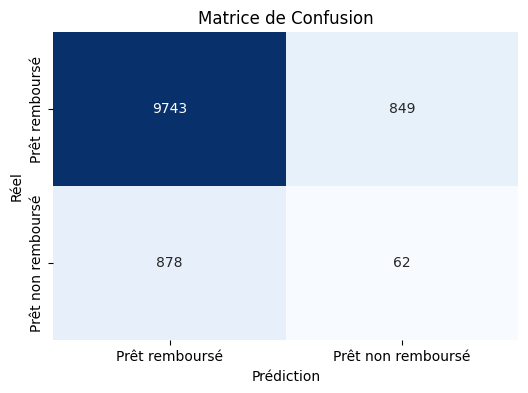

Score Client: -9629
Accuracy (Dummy): 0.850
AUC (Dummy): 0.493


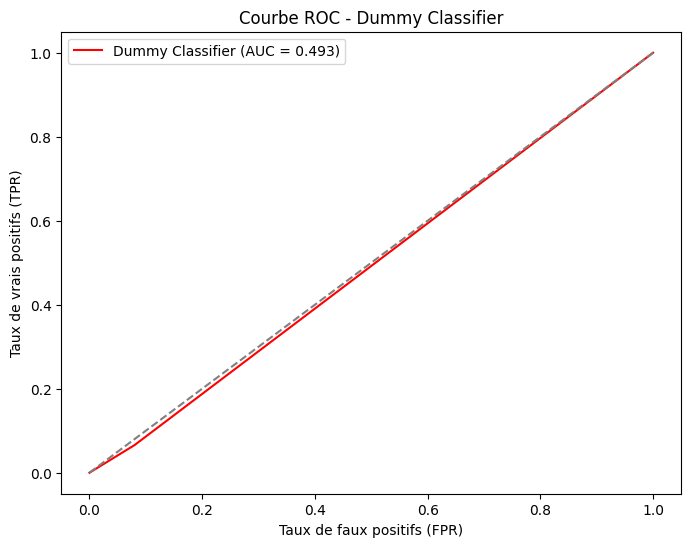

In [81]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42) #Prédiction aléatoire selon la distribution des classes.
dummy_clf.fit(X_train, Y_train)

y_pred_dummy = dummy_clf.predict(X_test)

# Calcul des métriques
print("Classification Report (DummyClassifier):")
print(classification_report(Y_test, y_pred_dummy))


# Calcul de l'accuracy
accuracy_dummy = accuracy_score(Y_test, y_pred_dummy)
print(f"Accuracy (DummyClassifier): {accuracy_dummy:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_dummy)
tn, fp, fn, tp = conf_matrix.ravel()

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# Prédictions des probabilités pour la classe positive (1)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]


# Évaluation
tot=tn+fp+fn+tp
client_score = -(fp +  10*fn) # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

accuracy_dummy = accuracy_score(Y_test, y_pred_dummy)
auc_dummy = roc_auc_score(Y_test, y_proba_dummy)
print(f"Accuracy (Dummy): {accuracy_dummy:.3f}")
print(f"AUC (Dummy): {auc_dummy:.3f}")


# Prédictions des probabilités pour la classe positive (1)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]


# Courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba_dummy)

# Affichage
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Dummy Classifier (AUC = {auc_dummy:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale (random)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Dummy Classifier")
plt.legend()
plt.show()


AUC proche de 0.5, le modèle dummy ne distingue pas mieux qu'une prédiction aléatoire (suivant la proportion )

## Régression Logistique

In [82]:
# Créer un pipeline qui impute d'abord puis scale
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des NaN
    ('scaler', StandardScaler())                   # Standardisation (moyenne=0, écart-type=1)
])

# Appliquer le pipeline sur les données d'entraînement
X_train_transformed = pipeline.fit_transform(X_train)

# Appliquer le même pipeline sur les données de test (en utilisant les mêmes paramètres)
X_test_transformed = pipeline.transform(X_test)



### Régression sans optimisation

In [84]:
# Modèle linéaire avec équilibrage des classes sans optimisation du seuil

log_clf = LogisticRegression(class_weight='balanced', max_iter=500)
log_clf.fit(X_train_transformed, Y_train)

# Calcul des prédictions binaires (0 ou 1)
y_pred_log = log_clf.predict(X_test_transformed)

# Calcul des probabilités pour la classe 1
y_proba_log = log_clf.predict_proba(X_test_transformed)[:, 1]

Classification Report (Regression Lineaire):
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     10592
           1       0.17      0.66      0.27       940

    accuracy                           0.70     11532
   macro avg       0.56      0.68      0.54     11532
weighted avg       0.89      0.70      0.77     11532

Accuracy (Reg Lineaire): 0.70


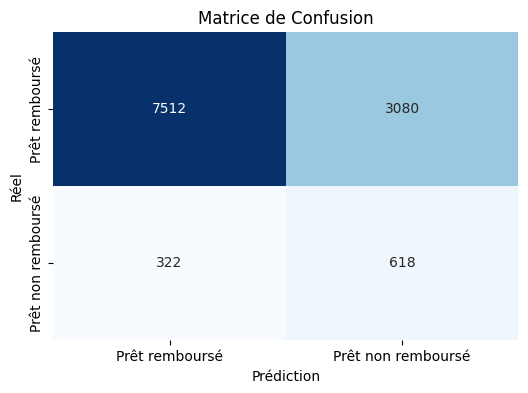

Score Client: -6300
Accuracy (Reg Lineaire): 0.705
AUC (Reg Lineaire): 0.746


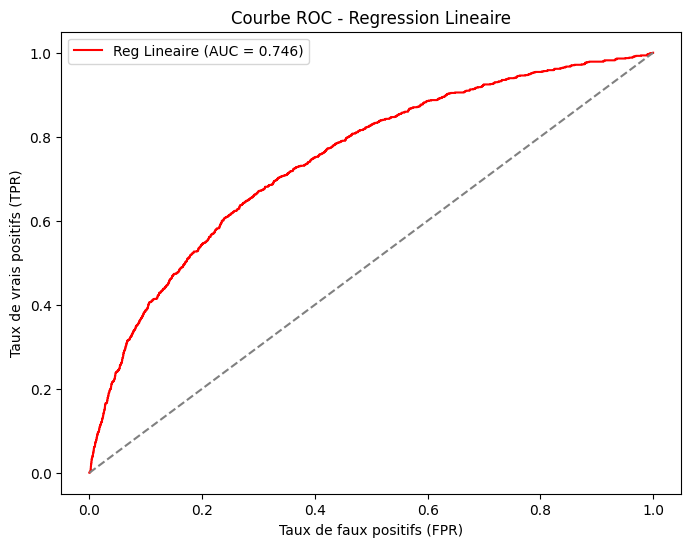

In [85]:
# Evaluation du modèle

# Calcul des métriques
print("Classification Report (Regression Lineaire):")
print(classification_report(Y_test, y_pred_log))


# Calcul de l'accuracy
accuracy_log = accuracy_score(Y_test, y_pred_log)
print(f"Accuracy (Reg Lineaire): {accuracy_log:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_log)
tn, fp, fn, tp = conf_matrix.ravel()


# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()


# Évaluation
client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")


accuracy_dummy = accuracy_score(Y_test, y_pred_log)
auc_dummy = roc_auc_score(Y_test, y_proba_log)
print(f"Accuracy (Reg Lineaire): {accuracy_dummy:.3f}")
print(f"AUC (Reg Lineaire): {auc_dummy:.3f}")



# Courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba_log)

# Affichage
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Reg Lineaire (AUC = {auc_dummy:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale (random)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Regression Lineaire")
plt.legend()
plt.show()

### Application Lasso pour réduire les features

In [87]:
# Instantiation du modèle de régression logistique avec Lasso
log_clf_lasso = LogisticRegression(class_weight='balanced', penalty='l1', solver='saga', max_iter=500)

# Entraînement du modèle
log_clf_lasso.fit(X_train_transformed, Y_train)

# Calcul des prédictions binaires (0 ou 1)
y_pred_log_lasso = log_clf_lasso.predict(X_test_transformed)

# Calcul des probabilités pour la classe 1
y_proba_log_lasso = log_clf_lasso.predict_proba(X_test_transformed)[:, 1]



Accuracy (Lasso): 0.706
AUC (Lasso): 0.748
Classification Report (Lasso):
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     10592
           1       0.17      0.66      0.27       940

    accuracy                           0.71     11532
   macro avg       0.56      0.69      0.54     11532
weighted avg       0.90      0.71      0.77     11532



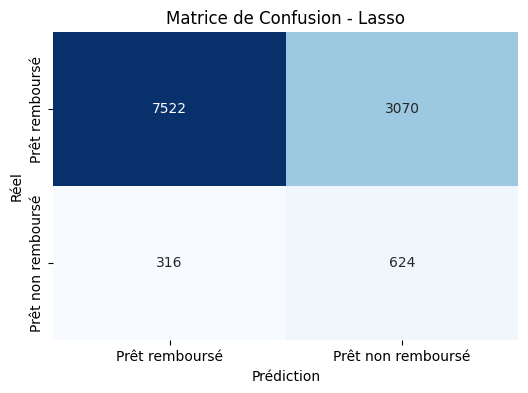

Score Client: -6230


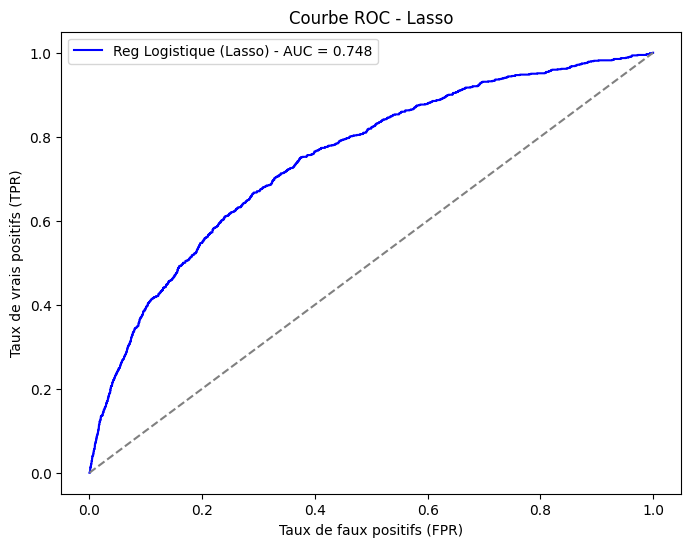

In [88]:

# Calcul de l'accuracy et AUC
accuracy_log_lasso = accuracy_score(Y_test, y_pred_log_lasso)
auc_log_lasso = roc_auc_score(Y_test, y_proba_log_lasso)

# Afficher les résultats
print(f"Accuracy (Lasso): {accuracy_log_lasso:.3f}")
print(f"AUC (Lasso): {auc_log_lasso:.3f}")

# Affichage du classification report
print("Classification Report (Lasso):")
print(classification_report(Y_test, y_pred_log_lasso))

# Calculer la matrice de confusion
conf_matrix_lasso = confusion_matrix(Y_test, y_pred_log_lasso)
tn, fp, fn, tp = conf_matrix_lasso.ravel()


# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lasso, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Lasso")
plt.show()

# Score client (en tenant compte du coût de FN et FP)
tot=tn+fp+fn+tp
client_score = -(10*fn +   fp)  # coût d’un fn est  supérieur au coût d’un fp
print(f"Score Client: {client_score}")


# Courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba_log_lasso)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Reg Logistique (Lasso) - AUC = {auc_log_lasso:.3f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale (random)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Lasso")
plt.legend()
plt.show()

In [89]:
# Récupérer les coefficients du modèle
coefficients = log_clf.coef_

# Compter le nombre de coefficients non nuls
non_zero_coeffs = np.count_nonzero(coefficients)

print(f"Nombre de variables retenues (coefficients non nuls) : {non_zero_coeffs}")

Nombre de variables retenues (coefficients non nuls) : 766


Seuil: 0.2
Score Client: -8136

Seuil: 0.25
Score Client: -7569

Seuil: 0.3
Score Client: -7175

Seuil: 0.35
Score Client: -6791

Seuil: 0.39999999999999997
Score Client: -6615

Seuil: 0.44999999999999996
Score Client: -6397

Seuil: 0.49999999999999994
Score Client: -6300

Seuil: 0.5499999999999999
Score Client: -6245

Seuil: 0.5999999999999999
Score Client: -6428

Seuil: 0.6499999999999999
Score Client: -6565

Seuil: 0.7
Score Client: -6733

Seuil: 0.7499999999999998
Score Client: -7007

Seuil: 0.7999999999999998
Score Client: -7540

Seuil: 0.8499999999999999
Score Client: -8042

Seuil: 0.8999999999999999
Score Client: -8629

Seuil: 0.9499999999999997
Score Client: -9142


=== Meilleur seuil trouvé ===
Seuil Optimal: 0.55
Meilleur Score Client: -6245
Matrice de Confusion associée: TN=8047, FP=2545, FN=370, TP=570


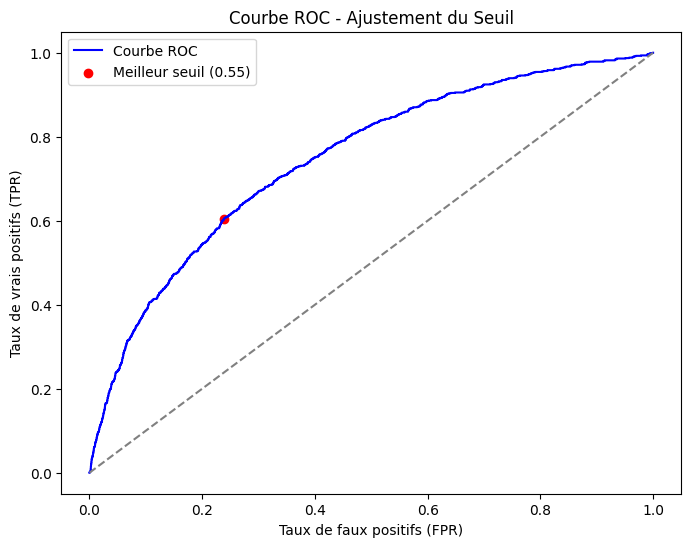

In [90]:
# Seuils à tester (par exemple, de 0.1 à 0.9)
liste_seuil = np.arange(0.2, 1, 0.05)


# Initialiser les variables pour suivre le meilleur score et seuil
best_seuil = None
best_client_score = float('-inf')  # On commence avec le score le plus bas possible
best_conf_matrix = None

# Calculer la matrice de confusion et le score client pour chaque seuil
for seuil in liste_seuil:
    y_pred_adjusted = (y_proba_log >= seuil).astype(int)  # Ajuster la prédiction selon le seuil
    
    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred_adjusted)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculer le score client
    tot=tn+fp+fn+tp
    client_score = -(10*fn +   fp)  # coût d’un FP est  supérieur au coût d’un FN
    print(f"Seuil: {seuil}")
    print(f"Score Client: {client_score}")
    print()

    # Mettre à jour le meilleur score et seuil si le score client est meilleur
    if client_score > best_client_score:
        best_client_score = client_score
        best_seuil = seuil
        best_conf_matrix = conf_matrix
  
        

# Afficher les résultats du meilleur seuil
print("\n=== Meilleur seuil trouvé ===")
print(f"Seuil Optimal: {best_seuil:.2f}")
print(f"Meilleur Score Client: {best_client_score}")
tn, fp, fn, tp = best_conf_matrix.ravel()
print(f"Matrice de Confusion associée: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Courbe ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Courbe ROC", color='blue')
plt.scatter(
    fpr[np.argmin(abs(thresholds - best_seuil))], 
    tpr[np.argmin(abs(thresholds - best_seuil))],
    color='red',
    label=f"Meilleur seuil ({best_seuil:.2f})"
)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale (random)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Ajustement du Seuil")
plt.legend()
plt.show()


In [92]:
# Paramètres à tester
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Créer le modèle de Lasso
lasso = Lasso()

# Appliquer GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_transformed, Y_train)

# Afficher les meilleurs paramètres
print("Meilleur alpha trouvé: ", grid_search.best_params_)

# Utiliser le meilleur modèle
best_lasso = grid_search.best_estimator_


Meilleur alpha trouvé:  {'alpha': 0.001}


## RandomForest Classifier

### Lancement du modèle brute (807 colonnes, sans compensation)

In [93]:
# Définir l'URI de suivi pour le serveur local
mlflow.set_tracking_uri('http://127.0.0.1:5000')

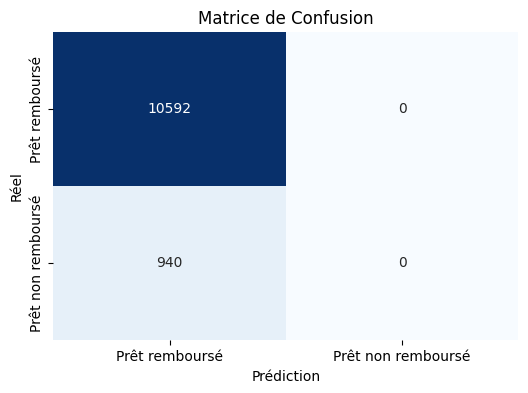

2024/12/18 15:08:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_All at: http://127.0.0.1:5000/#/experiments/0/runs/008e30e8e49942a2a4e579b088dfc261.
2024/12/18 15:08:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


Accuracy: 0.9184876864377385
False Positives: 0
False Negatives: 940
Score Client: -9400
                   feature  importance
31            EXT_SOURCE_2    0.017068
32            EXT_SOURCE_3    0.011057
253     DAYS_EMPLOYED_PERC    0.006968
30            EXT_SOURCE_1    0.006257
10           DAYS_EMPLOYED    0.006227
9               DAYS_BIRTH    0.005967
261  BURO_DAYS_CREDIT_MEAN    0.005611
11       DAYS_REGISTRATION    0.005559
12         DAYS_ID_PUBLISH    0.005470
256    ANNUITY_INCOME_PERC    0.004786


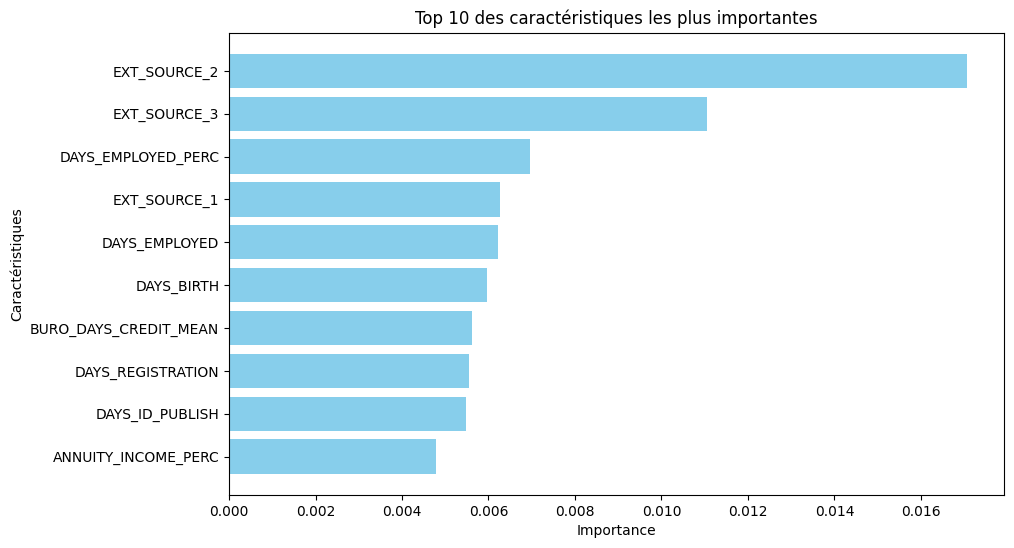

In [95]:

# Initialiser les hyperparamètres pour Random Forest
n_estimators = 150
random_state = 76

# Créer un exemple d'entrée pour le modèle (ici, on prend le premier échantillon du jeu de test)
input_example = X_test[:1]

# Nom personnalisé du run
run_name = "RandomForest_All"

# Démarrer une session MLflow pour suivre l'expérience
with mlflow.start_run(run_name=run_name):
    # Initialiser le modèle Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Entraîner le modèle
    rf_classifier.fit(X_train, Y_train)

    # Prédire les valeurs pour les données de test
    y_pred = rf_classifier.predict(X_test)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Afficher la matrice de confusion avec Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
    plt.xlabel("Prédiction")
    plt.ylabel("Réel")
    plt.title("Matrice de Confusion")
    plt.show()

    # Calculer la précision
    accuracy = accuracy_score(Y_test, y_pred)

    # Enregistrer les hyperparamètres, les métriques et le modèle avec MLflow
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    mlflow.sklearn.log_model(rf_classifier, "random_forest_model", input_example=input_example)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Extraire l'importance des caractéristiques
feature_importances = rf_classifier.feature_importances_

# Créer un DataFrame pour afficher l'importance des caractéristiques avec leurs noms
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
print(feature_importance_df.head(10))

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.title("Top 10 des caractéristiques les plus importantes")
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher la plus importante en haut
plt.show()





### RandomForest All Réquilibré

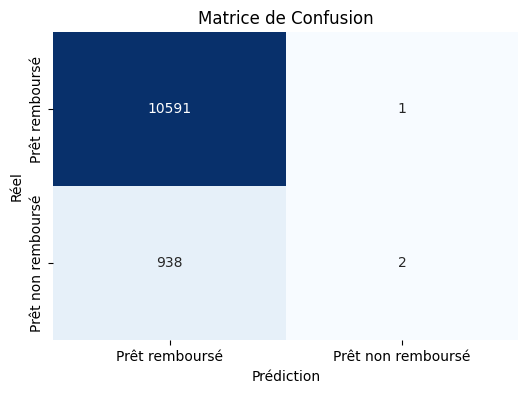

2024/12/18 15:09:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Balanced at: http://127.0.0.1:5000/#/experiments/0/runs/0b579ebba0cf4235a731294e3d5c51d2.
2024/12/18 15:09:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


Accuracy: 0.9185744016649323
False Positives: 1
False Negatives: 938
Score Client: -9381
                                  feature  importance
31                           EXT_SOURCE_2    0.024636
32                           EXT_SOURCE_3    0.016816
10                          DAYS_EMPLOYED    0.011032
30                           EXT_SOURCE_1    0.009728
253                    DAYS_EMPLOYED_PERC    0.009716
..                                    ...         ...
384              PREV_APP_CREDIT_PERC_MIN    0.003346
375                  PREV_AMT_ANNUITY_MIN    0.003341
582         APPROVED_AMT_GOODS_PRICE_MEAN    0.003322
629  POS_NAME_CONTRACT_STATUS_Active_MEAN    0.003297
570               APPROVED_AMT_CREDIT_MIN    0.003291

[100 rows x 2 columns]


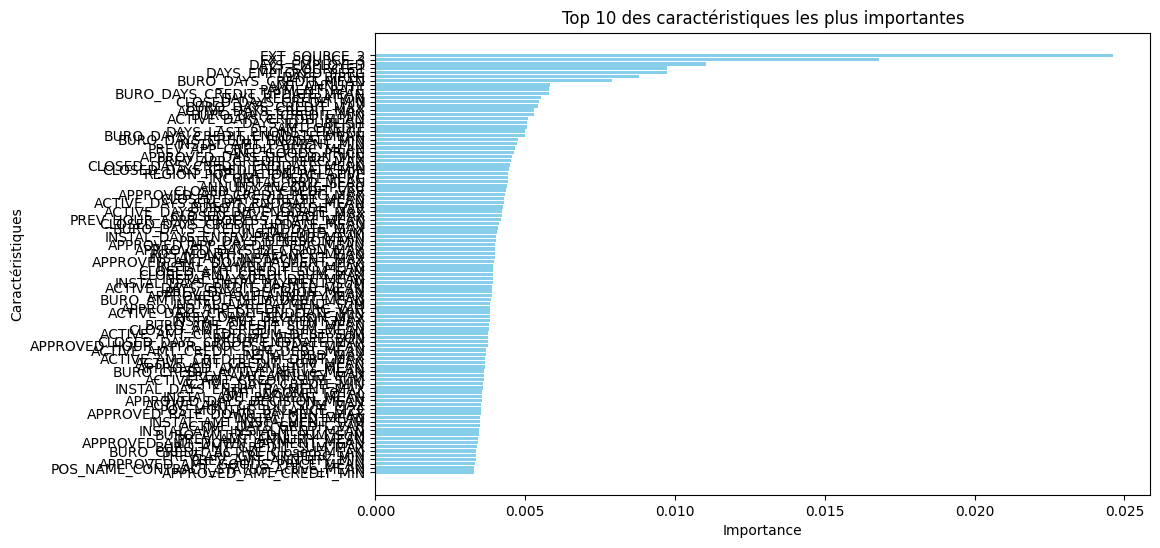

In [96]:
# Initialiser les hyperparamètres pour Random Forest
n_estimators = 150
random_state = 76

# Créer un exemple d'entrée pour le modèle (ici, on prend le premier échantillon du jeu de test)
input_example = X_test[:1]

# Nom personnalisé du run
run_name = "RandomForest_Balanced"

# Démarrer une session MLflow pour suivre l'expérience
with mlflow.start_run(run_name=run_name):
    # Initialiser le modèle Random Forest Classifier avec gestion des classes déséquilibrées
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        class_weight="balanced"  # Ajuster les poids des classes
    )

    # Entraîner le modèle
    rf_classifier.fit(X_train, Y_train)

    # Prédire les valeurs pour les données de test
    y_pred = rf_classifier.predict(X_test)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Afficher la matrice de confusion avec Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
    plt.xlabel("Prédiction")
    plt.ylabel("Réel")
    plt.title("Matrice de Confusion")
    plt.show()

    # Calculer la précision
    accuracy = accuracy_score(Y_test, y_pred)

    # Enregistrer les hyperparamètres, les métriques et le modèle avec MLflow
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    mlflow.sklearn.log_model(rf_classifier, "random_forest_model", input_example=input_example)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Extraire l'importance des caractéristiques
feature_importances = rf_classifier.feature_importances_

# Créer un DataFrame pour afficher l'importance des caractéristiques avec leurs noms
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
print(feature_importance_df.head(100))

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:100], feature_importance_df['importance'][:100], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.title("Top 10 des caractéristiques les plus importantes")
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher la plus importante en haut
plt.show()


### RandomForest Equilibré sur 50 variables

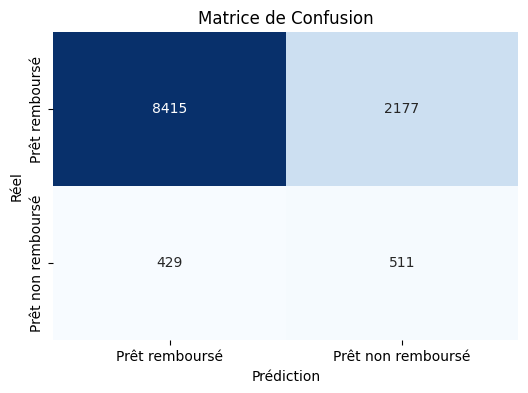

2024/12/18 15:10:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Top_Features50 at: http://127.0.0.1:5000/#/experiments/0/runs/d5eff7ae861a4125baee0cee97a6c1bf.
2024/12/18 15:10:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


Score Client: -6467


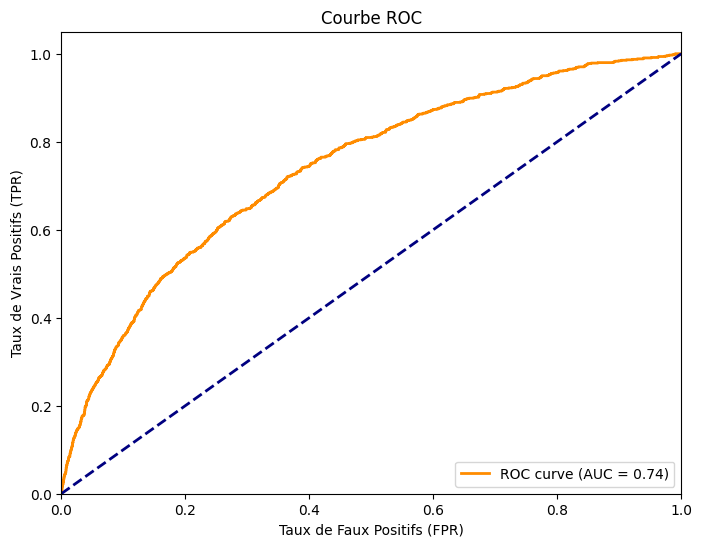

False Positives: 2177
False Negatives: 429
Accuracy (top 100 features): 0.774020117932709
AUC ROC: 0.7386887735424567
F1 Score: 0.2816979051819184


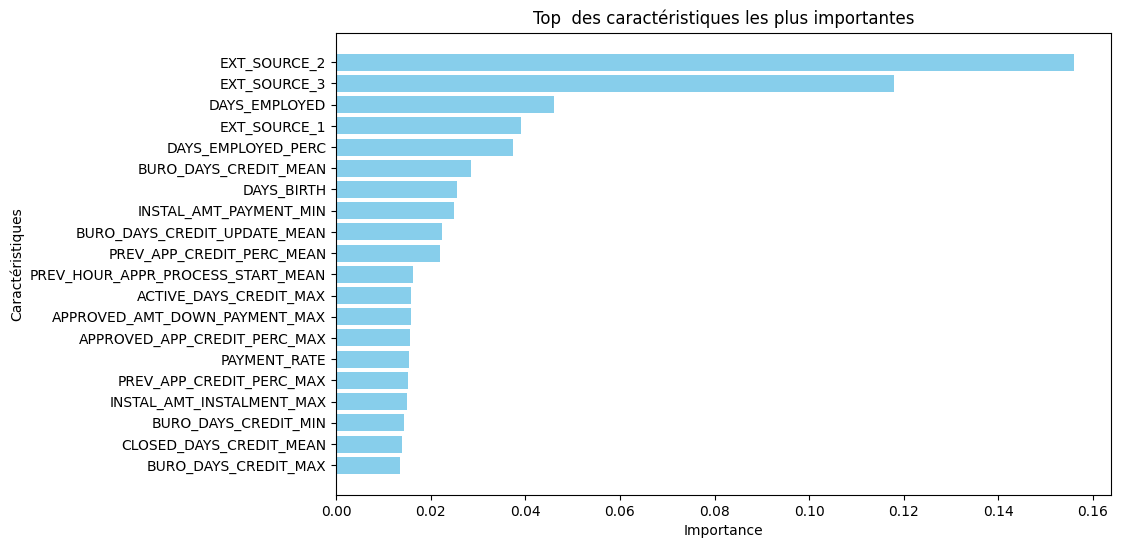

In [97]:
top=50

# Extraire les noms des caractéristiques les plus importantes (après l'entraînement)
top_feature_names = feature_importance_df.sort_values(by="importance", ascending=False).head(top)['feature'].tolist()

# Réduire X_train et X_test aux caractéristiques les plus importantes
X_train_top = X_train[top_feature_names]
X_test_top = X_test[top_feature_names]

# Initialiser les hyperparamètres pour Random Forest
n_estimators = 200
random_state = 76
max_depth=30
min_samples_leaf=100
min_samples_split=50


# Nom personnalisé du run
run_name = f"RandomForest_Top_Features{top}"

# Créer un exemple d'entrée pour le modèle (ici, on prend le premier échantillon du jeu de test)
input_example = X_train_top.iloc[:1]

# Initialiser et entraîner le modèle avec les 100 caractéristiques les plus importantes
with mlflow.start_run(run_name=run_name):
    rf_classifier_top = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,  
        class_weight="balanced"
    )
    
    rf_classifier_top.fit(X_train_top, Y_train)

    threshold = 0.5  # ajuster le seuil sous 50%
    y_pred_top = rf_classifier_top.predict(X_test_top)  # Prédictions binaires (0 ou 1)
    y_prob_top = rf_classifier_top.predict_proba(X_test_top)[:, 1]  # Probabilités pour la courbe ROC
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred_top)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Afficher la matrice de confusion avec Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
                yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
    plt.xlabel("Prédiction")
    plt.ylabel("Réel")
    plt.title("Matrice de Confusion")
    plt.show()

    # Calculer les métriques
    false_positives = fp
    false_negatives = fn
    accuracy = accuracy_score(Y_test, y_pred_top)
    auc_roc = roc_auc_score(Y_test, y_prob_top)  # AUC ROC
    f1 = f1_score(Y_test, y_pred_top)  # F1 Score

   

    # Enregistrer les hyperparamètres, les métriques et le modèle avec MLflow
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", false_positives)
    mlflow.log_metric("False Negatives", false_negatives)
    mlflow.log_metric("AUC ROC", auc_roc)
    mlflow.log_metric("F1 Score", f1)

    # Enregistrer le modèle avec un exemple d'entrée pour déduire automatiquement la signature
    mlflow.sklearn.log_model(rf_classifier_top, "random_forest_model_top", input_example=input_example)

# Calculer les courbes ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_top)

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de hasard
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()



# Afficher les résultats
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Accuracy (top 100 features): {accuracy}")
print(f"AUC ROC: {auc_roc}")
print(f"F1 Score: {f1}")

# Extraire l'importance des caractéristiques après l'entraînement du modèle
feature_importances_top = rf_classifier_top.feature_importances_

# Créer un DataFrame pour afficher l'importance des caractéristiques avec leurs noms
feature_importance_df_top = pd.DataFrame({
    'feature': top_feature_names,
    'importance': feature_importances_top
}).sort_values(by='importance', ascending=False)


# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_top['feature'][:20], feature_importance_df_top['importance'][:20], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.title("Top  des caractéristiques les plus importantes")
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher la plus importante en haut
plt.show()

### Grid Search

In [98]:
len(top_feature_names)

50

In [99]:
X_train_top.shape

(34594, 50)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 500, 'min_samples_split': 2, 'n_estimators': 1200}
Accuracy: 0.7049080818591744
Recall: 0.5957446808510638
AUC ROC: 0.7199996384264318
Score Client: -9381


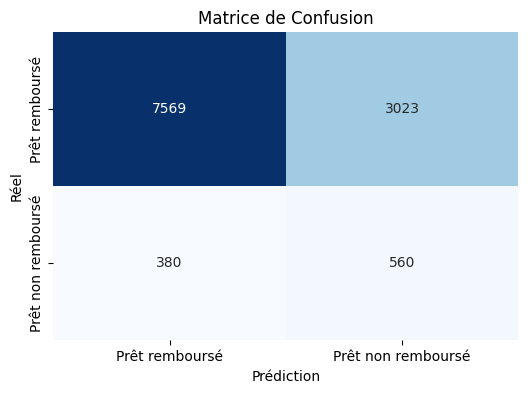

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.820877      0.682083         0.085633        0.023849   
1      17.620028      0.463621         0.089829        0.009570   
2     151.424155      0.880211         0.696059        0.031218   

  param_class_weight  param_max_depth  param_min_samples_leaf  \
0           balanced               10                     500   
1           balanced               10                     500   
2           balanced               10                     500   

   param_min_samples_split  param_n_estimators  \
0                        2                  50   
1                        2                 100   
2                        2                1200   

                                              params  split0_test_score  \
0  {'class_weight': 'balanced', 'max_depth': 10, ...           0.701106   
1  {'class_weight': 'balanced', 'max_depth': 10, ...           0.702722   
2  {'class_weight': 'balanced', 'max_depth':

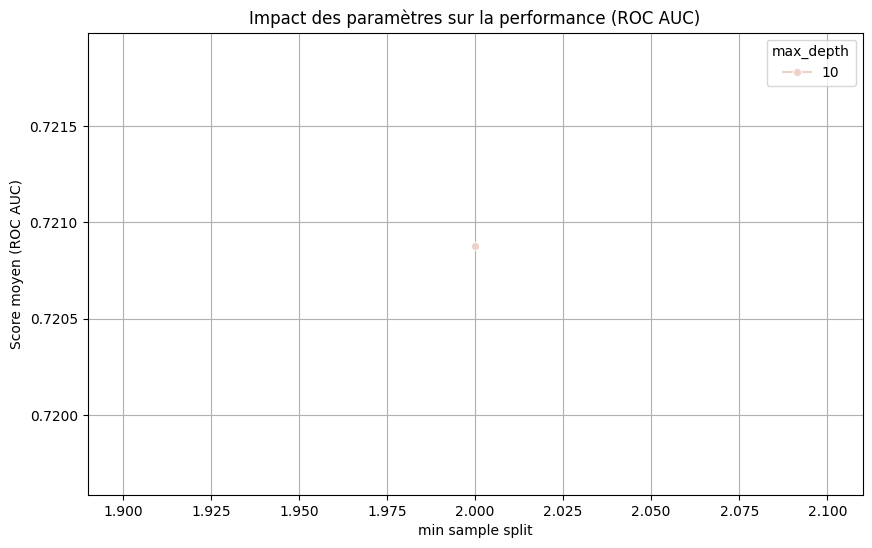

In [100]:
# Paramètres du modèle à tester
param_grid = {
    'n_estimators': [50,100,1200],  # Nombre d'arbres dans la forêt
    'max_depth': [10],      # Profondeur des arbres
    'min_samples_split': [2],       # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [500],         # Nombre minimum d'échantillons dans une feuille
    'class_weight': ['balanced']      # Équilibrage des classes
}

# Initialisation du modèle RandomForest
rf_classifier = RandomForestClassifier(random_state=76)

# Définir la validation croisée (Stratified KFold pour équilibrer les classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuration de GridSearchCV avec un niveau de verbose
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=3  # Niveau de verbosité pour afficher les détails de chaque fit
)

# Lancer GridSearchCV
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Best parameters: {grid_search.best_params_}")

# Obtenez le meilleur modèle
best_rf_classifier = grid_search.best_estimator_

# Effectuer des prédictions avec le meilleur modèle
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1

# Ajuster le seuil (par exemple, seuil de 0.5 pour réduire les faux négatifs)
threshold = 0.5
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Calculer les métriques sur les données de test
accuracy = accuracy_score(Y_test, y_pred_adjusted)
recall = recall_score(Y_test, y_pred_adjusted)
auc_roc = roc_auc_score(Y_test, y_prob)



# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")


# Optionnel : Afficher la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()



# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les premières lignes
print(results_df.head())

# Exemple de visualisation : Influence de 'n_estimators' et 'max_depth' sur le score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='param_min_samples_split', 
    y='mean_test_score', 
    hue='param_max_depth',
    marker='o'
)
plt.title('Impact des paramètres sur la performance (ROC AUC)')
plt.xlabel('min sample split')
plt.ylabel('Score moyen (ROC AUC)')
plt.legend(title='max_depth')
plt.grid()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 200}
Accuracy: 0.8600416233090531
Recall: 0.3425531914893617
AUC ROC: 0.742881821687986
Score Client: -7176


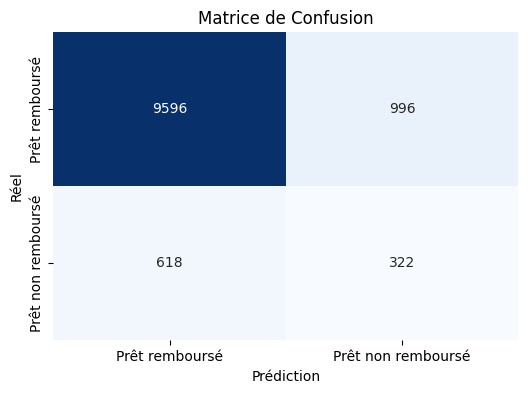

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.711178      3.158643         0.169507        0.029813   
1      47.652381      4.371526         0.259099        0.061467   
2     101.662443      5.234823         0.560078        0.125749   
3      24.377872      5.462323         0.157918        0.034696   
4      52.048288      2.009326         0.285829        0.037925   

  param_class_weight  param_max_depth  param_min_samples_leaf  \
0           balanced               30                      10   
1           balanced               30                      10   
2           balanced               30                      10   
3           balanced               30                      10   
4           balanced               30                      10   

   param_min_samples_split  param_n_estimators  \
0                       10                  50   
1                       10                 100   
2                       10                 200   
3     

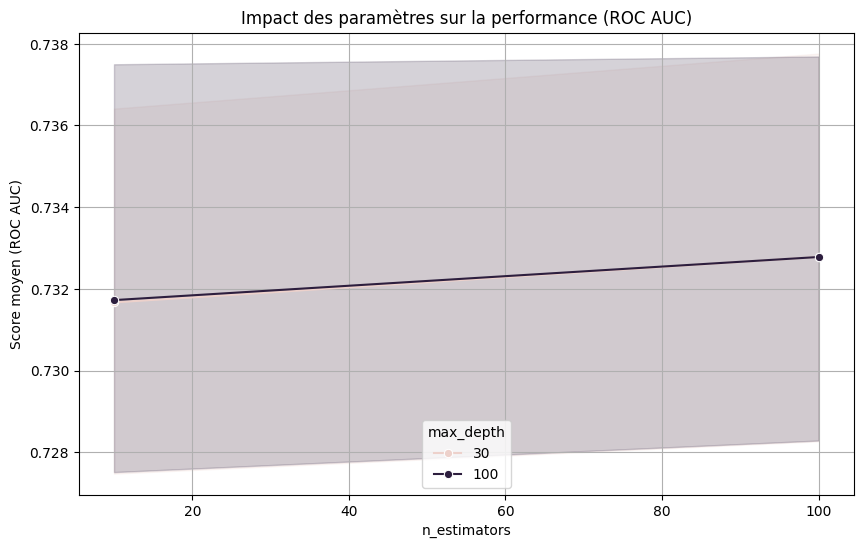

In [101]:
# Grid Search reduction colonnes

# Paramètres du modèle à tester
param_grid = {
    'n_estimators': [50,100,200],  # Nombre d'arbres dans la forêt
    'max_depth': [30,100],                 # Profondeur des arbres
    'min_samples_split': [10,100],         # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [10,500],         # Nombre minimum d'échantillons dans une feuille
    'class_weight': ['balanced']    #équilibrage des classes
}

# Initialisation du modèle RandomForest
rf_classifier = RandomForestClassifier(random_state=76)

# Définir la validation croisée (Stratified KFold pour équilibrer les classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuration de GridSearchCV avec un niveau de verbose
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=3  # Niveau de verbosité pour afficher les détails de chaque fit
)

# Lancer GridSearchCV
grid_search.fit(X_train_top, Y_train)


# Effectuer la recherche sur les paramètres
grid_search.fit(X_train_top, Y_train)



# Afficher les meilleurs paramètres trouvés
print(f"Best parameters: {grid_search.best_params_}")

# Obtenez le meilleur modèle
best_rf_classifier = grid_search.best_estimator_

# Effectuer des prédictions avec le meilleur modèle
y_prob_top = best_rf_classifier.predict_proba(X_test_top)[:, 1]  # Probabilités pour la classe 1

# Ajuster le seuil (par exemple, seuil de 0.3 pour réduire les faux négatifs)
threshold = 0.5
y_pred_top_adjusted = (y_prob_top >= threshold).astype(int)

# Calculer les métriques sur les données de test
accuracy = accuracy_score(Y_test, y_pred_top_adjusted)
recall = recall_score(Y_test, y_pred_top_adjusted)
auc_roc = roc_auc_score(Y_test, y_prob_top)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Optionnel : Afficher la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()




# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les premières lignes
print(results_df.head())

# Exemple de visualisation : Influence de 'n_estimators' et 'max_depth' sur le score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='param_min_samples_split', 
    y='mean_test_score', 
    hue='param_max_depth',
    marker='o'
)
plt.title('Impact des paramètres sur la performance (ROC AUC)')
plt.xlabel('n_estimators')
plt.ylabel('Score moyen (ROC AUC)')
plt.legend(title='max_depth')
plt.grid()
plt.show()



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 300}
Accuracy: 0.8604751994450226
Recall: 0.34361702127659577
AUC ROC: 0.7433887277431381
Score Client: -7162


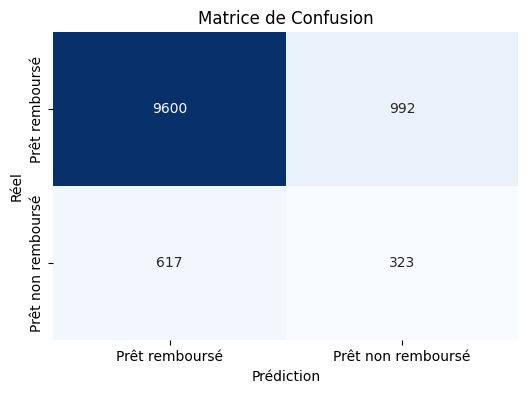

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     106.398230      7.600023         0.480047        0.084970   
1     162.771562      4.265957         0.713032        0.138344   
2     103.774460      8.850327         0.468093        0.083486   
3     155.420531      7.421474         0.736134        0.136530   
4      78.326438      3.966977         0.321944        0.020422   

  param_class_weight  param_max_depth  param_min_samples_leaf  \
0           balanced               30                      10   
1           balanced               30                      10   
2           balanced               30                      10   
3           balanced               30                      10   
4           balanced               30                     100   

   param_min_samples_split  param_n_estimators  \
0                       50                 200   
1                       50                 300   
2                      100                 200   
3     

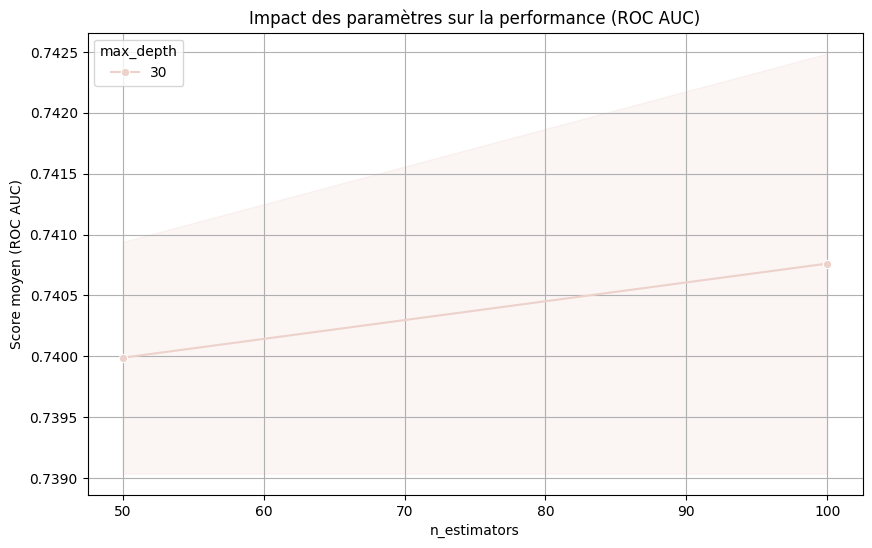

In [102]:
# Grid Search reduction colonnes round 2

# Paramètres du modèle à tester
param_grid = {
    'n_estimators': [200,300],  # Nombre d'arbres dans la forêt
    'max_depth': [30],                 # Profondeur des arbres
    'min_samples_split': [50,100],         # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [10,100],         # Nombre minimum d'échantillons dans une feuille
    'class_weight': ['balanced']    #équilibrage des classes
}

# Initialisation du modèle RandomForest
rf_classifier = RandomForestClassifier(random_state=76)

# Définir la validation croisée (Stratified KFold pour équilibrer les classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuration de GridSearchCV avec un niveau de verbose
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=3  # Niveau de verbosité pour afficher les détails de chaque fit
)

# Lancer GridSearchCV
grid_search.fit(X_train_top, Y_train)


# Effectuer la recherche sur les paramètres
grid_search.fit(X_train_top, Y_train)



# Afficher les meilleurs paramètres trouvés
print(f"Best parameters: {grid_search.best_params_}")

# Obtenez le meilleur modèle
best_rf_classifier = grid_search.best_estimator_

# Effectuer des prédictions avec le meilleur modèle
y_prob_top = best_rf_classifier.predict_proba(X_test_top)[:, 1]  # Probabilités pour la classe 1

# Ajuster le seuil (par exemple, seuil de 0.3 pour réduire les faux négatifs)
threshold = 0.5
y_pred_top_adjusted = (y_prob_top >= threshold).astype(int)

# Calculer les métriques sur les données de test
accuracy = accuracy_score(Y_test, y_pred_top_adjusted)
recall = recall_score(Y_test, y_pred_top_adjusted)
auc_roc = roc_auc_score(Y_test, y_prob_top)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Optionnel : Afficher la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()




# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les premières lignes
print(results_df.head())

# Exemple de visualisation : Influence de 'n_estimators' et 'max_depth' sur le score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='param_min_samples_split', 
    y='mean_test_score', 
    hue='param_max_depth',
    marker='o'
)
plt.title('Impact des paramètres sur la performance (ROC AUC)')
plt.xlabel('n_estimators')
plt.ylabel('Score moyen (ROC AUC)')
plt.legend(title='max_depth')
plt.grid()
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 300}
Accuracy: 0.772372528616025
Recall: 0.5404255319148936
AUC ROC: 0.7390412073343189
Score Client: -6513


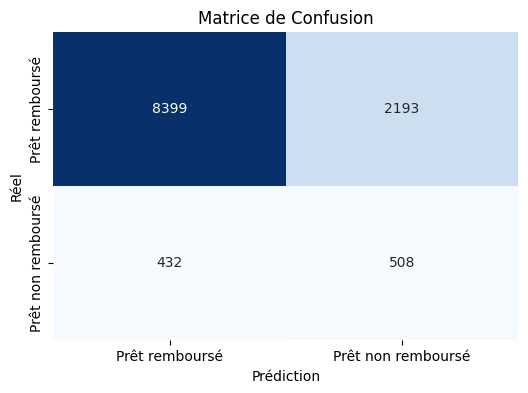

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     112.563598      6.600761         0.462575        0.129231   
1     116.692162      3.347650         0.396342        0.037265   
2      98.511912      6.160297         0.491833        0.090126   
3      67.953368     21.350794         0.247795        0.064492   

  param_class_weight  param_max_depth  param_min_samples_leaf  \
0           balanced               30                     100   
1           balanced               30                     100   
2           balanced               30                     200   
3           balanced               30                     200   

   param_min_samples_split  param_n_estimators  \
0                      100                 300   
1                      200                 300   
2                      100                 300   
3                      200                 300   

                                              params  split0_test_score  \
0  {'class_w

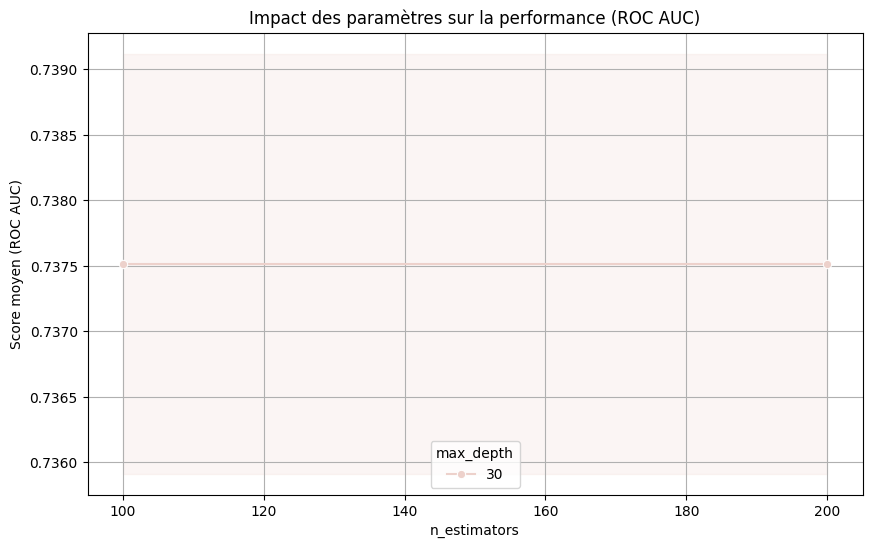

In [103]:
# Grid Search reduction colonnes round 3

# Paramètres du modèle à tester
param_grid = {
    'n_estimators': [300],  # Nombre d'arbres dans la forêt
    'max_depth': [30],                 # Profondeur des arbres
    'min_samples_split': [100,200],         # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [100,200],         # Nombre minimum d'échantillons dans une feuille
    'class_weight': ['balanced']    #équilibrage des classes
}

# Initialisation du modèle RandomForest
rf_classifier = RandomForestClassifier(random_state=76)

# Définir la validation croisée (Stratified KFold pour équilibrer les classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuration de GridSearchCV avec un niveau de verbose
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=3  # Niveau de verbosité pour afficher les détails de chaque fit
)

# Lancer GridSearchCV
grid_search.fit(X_train_top, Y_train)


# Effectuer la recherche sur les paramètres
grid_search.fit(X_train_top, Y_train)



# Afficher les meilleurs paramètres trouvés
print(f"Best parameters: {grid_search.best_params_}")

# Obtenez le meilleur modèle
best_rf_classifier = grid_search.best_estimator_

# Effectuer des prédictions avec le meilleur modèle
y_prob_top = best_rf_classifier.predict_proba(X_test_top)[:, 1]  # Probabilités pour la classe 1

# Ajuster le seuil (par exemple, seuil de 0.3 pour réduire les faux négatifs)
threshold = 0.5
y_pred_top_adjusted = (y_prob_top >= threshold).astype(int)

# Calculer les métriques sur les données de test
accuracy = accuracy_score(Y_test, y_pred_top_adjusted)
recall = recall_score(Y_test, y_pred_top_adjusted)
auc_roc = roc_auc_score(Y_test, y_prob_top)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Optionnel : Afficher la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()




# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les premières lignes
print(results_df.head())

# Exemple de visualisation : Influence de 'n_estimators' et 'max_depth' sur le score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='param_min_samples_split', 
    y='mean_test_score', 
    hue='param_max_depth',
    marker='o'
)
plt.title('Impact des paramètres sur la performance (ROC AUC)')
plt.xlabel('n_estimators')
plt.ylabel('Score moyen (ROC AUC)')
plt.legend(title='max_depth')
plt.grid()
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.9062608394033992
Recall: 0.15531914893617021
AUC ROC: 0.7417949918043325
Score Client: -8227


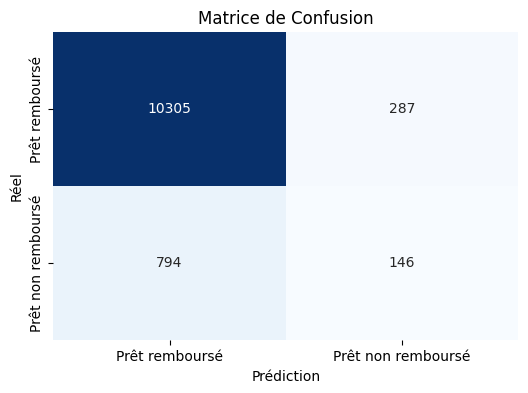

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     190.772719      1.556426         0.653188        0.136577   
1     180.383532      2.476622         0.681030        0.145404   
2     128.874396      3.204304         1.436249        0.324041   
3     100.076933     12.974405         0.493753        0.272695   

  param_class_weight  param_max_depth  param_min_samples_leaf  \
0           balanced               30                      10   
1           balanced               30                      10   
2           balanced               30                     100   
3           balanced               30                     100   

   param_min_samples_split  param_n_estimators  \
0                       10                 300   
1                      100                 300   
2                       10                 300   
3                      100                 300   

                                              params  split0_test_score  \
0  {'class_w

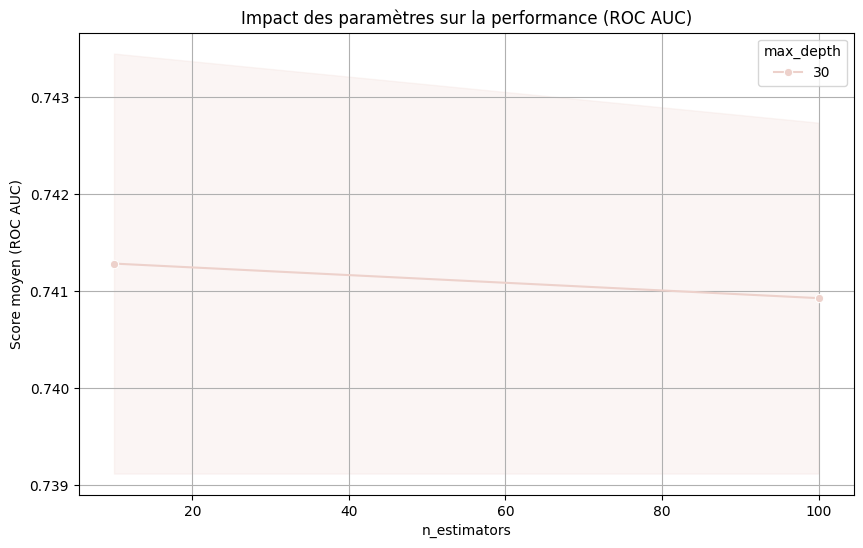

In [104]:
# recherche du seuil

# Paramètres du modèle à tester
param_grid = {
    'n_estimators': [300],  # Nombre d'arbres dans la forêt
    'max_depth': [30],                 # Profondeur des arbres
    'min_samples_split': [10,100],         # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [10,100],         # Nombre minimum d'échantillons dans une feuille
    'class_weight': ['balanced']    #équilibrage des classes
}

# Initialisation du modèle RandomForest
rf_classifier = RandomForestClassifier(random_state=76)

# Définir la validation croisée (Stratified KFold pour équilibrer les classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuration de GridSearchCV avec un niveau de verbose
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=3  # Niveau de verbosité pour afficher les détails de chaque fit
)

# Lancer GridSearchCV
grid_search.fit(X_train_top, Y_train)


# Effectuer la recherche sur les paramètres
grid_search.fit(X_train_top, Y_train)



# Afficher les meilleurs paramètres trouvés
print(f"Best parameters: {grid_search.best_params_}")

# Obtenez le meilleur modèle
best_rf_classifier = grid_search.best_estimator_

# Effectuer des prédictions avec le meilleur modèle
y_prob_top = best_rf_classifier.predict_proba(X_test_top)[:, 1]  # Probabilités pour la classe 1

# Ajuster le seuil (par exemple, seuil de 0.3 pour réduire les faux négatifs)
threshold = 0.5
y_pred_top_adjusted = (y_prob_top >= threshold).astype(int)

# Calculer les métriques sur les données de test
accuracy = accuracy_score(Y_test, y_pred_top_adjusted)
recall = recall_score(Y_test, y_pred_top_adjusted)
auc_roc = roc_auc_score(Y_test, y_prob_top)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Optionnel : Afficher la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_top_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()




# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les premières lignes
print(results_df.head())

# Exemple de visualisation : Influence de 'n_estimators' et 'max_depth' sur le score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='param_min_samples_split', 
    y='mean_test_score', 
    hue='param_max_depth',
    marker='o'
)
plt.title('Impact des paramètres sur la performance (ROC AUC)')
plt.xlabel('n_estimators')
plt.ylabel('Score moyen (ROC AUC)')
plt.legend(title='max_depth')
plt.grid()
plt.show()

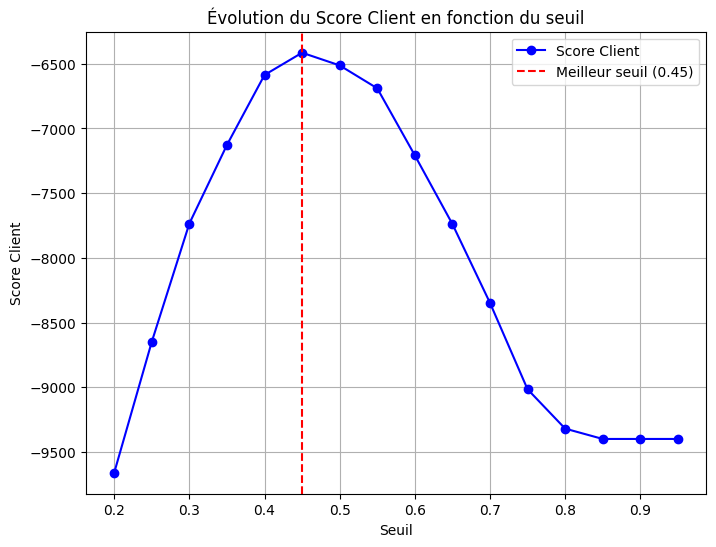


=== Meilleur seuil trouvé ===
Seuil Optimal: 0.45
Meilleur Score Client: -6415
Matrice de Confusion associée:
[[7507 3085]
 [ 333  607]]


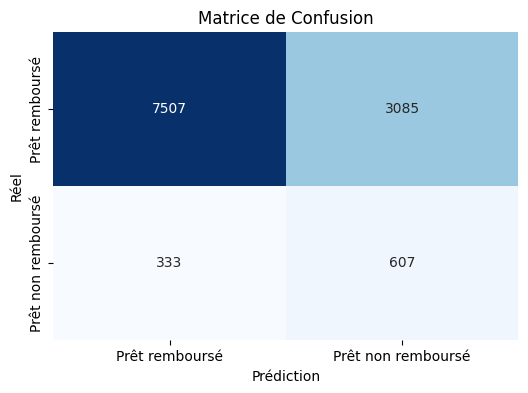


=== Métriques associées ===
Accuracy: 0.7036
Précision (Precision): 0.1644
Rappel (Recall): 0.6457
AUC ROC: 0.7390412073343189

Rapport de classification :
              precision    recall  f1-score   support

    Classe 0       0.96      0.71      0.81     10592
    Classe 1       0.16      0.65      0.26       940

    accuracy                           0.70     11532
   macro avg       0.56      0.68      0.54     11532
weighted avg       0.89      0.70      0.77     11532



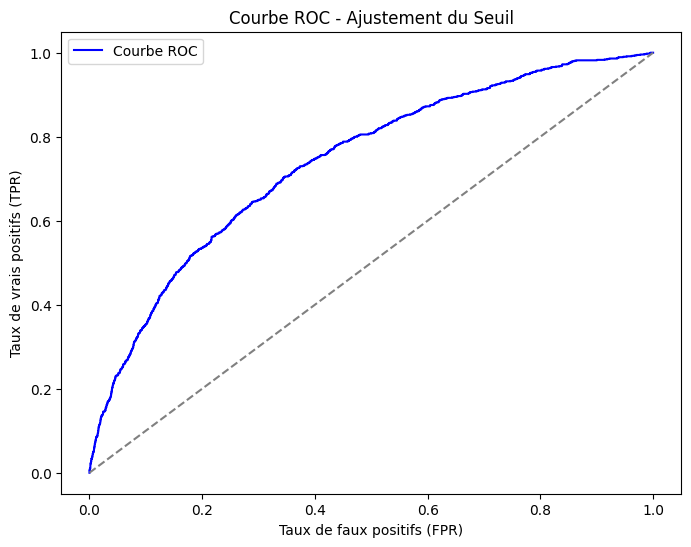

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle définis manuellement
rf_classifier = RandomForestClassifier(
    n_estimators=300,        # Nombre d'arbres
    max_depth=30,            # Profondeur maximale
    min_samples_split=100,   # Nombre minimum d'échantillons pour diviser un noeud
    min_samples_leaf=100,    # Nombre minimum d'échantillons dans une feuille
    class_weight='balanced', # Équilibrage des classes
    random_state=76
)

# Entraînement du modèle
rf_classifier.fit(X_train_top, Y_train)

# Probabilités prédites pour la classe 1
y_prob_top = rf_classifier.predict_proba(X_test_top)[:, 1]

# Liste des seuils à tester
thresholds = np.arange(0.2, 1, 0.05)

# Initialiser les variables pour suivre le meilleur score et seuil
best_threshold = None
best_client_score = float('-inf')  # On commence avec le score le plus bas possible
best_conf_matrix = None
best_y_pred = None
client_scores = []  # Liste pour stocker les scores clients

# Recherche du seuil optimal
for threshold in thresholds:
    y_pred_adjusted = (y_prob_top >= threshold).astype(int)  # Ajuster la prédiction selon le seuil
    
    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred_adjusted)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculer le score client
    client_score = -(10 * fn + fp)  # Coût : FN a un poids de 10, FP un poids de 1
    client_scores.append(client_score)  # Ajouter le score pour le tracé
    
    # Mettre à jour le meilleur score et seuil si le score client est meilleur
    if client_score > best_client_score:
        best_client_score = client_score
        best_threshold = threshold
        best_conf_matrix = conf_matrix
        best_y_pred = y_pred_adjusted

# Tracer le score client par seuil
plt.figure(figsize=(8, 6))
plt.plot(thresholds, client_scores, marker='o', label="Score Client", color='blue')
plt.axvline(best_threshold, color='red', linestyle='--', label=f"Meilleur seuil ({best_threshold:.2f})")
plt.xlabel("Seuil")
plt.ylabel("Score Client")
plt.title("Évolution du Score Client en fonction du seuil")
plt.legend()
plt.grid(True)
plt.show()

# Afficher les résultats du meilleur seuil
print("\n=== Meilleur seuil trouvé ===")
print(f"Seuil Optimal: {best_threshold:.2f}")
print(f"Meilleur Score Client: {best_client_score}")
tn, fp, fn, tp = best_conf_matrix.ravel()
print(f"Matrice de Confusion associée:\n{best_conf_matrix}")


# Tracé de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# Calcul et affichage des métriques
accuracy = accuracy_score(Y_test, best_y_pred)
print("\n=== Métriques associées ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Précision (Precision): {tp / (tp + fp):.4f}")
print(f"Rappel (Recall): {tp / (tp + fn):.4f}")

auc_roc = roc_auc_score(Y_test, y_prob_top)
print(f"AUC ROC: {auc_roc}")





# Utilisation de classification_report pour un résumé complet
print("\nRapport de classification :")
print(classification_report(Y_test, best_y_pred, target_names=["Classe 0", "Classe 1"]))

# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(Y_test, y_prob_top)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Courbe ROC", color='blue')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonale (random)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Ajustement du Seuil")
plt.legend()
plt.show()




## Modèle LightGBM

In [85]:
mlflow.set_tracking_uri("http://localhost:5000")

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=76, test_size=0.25)


In [87]:
X_train.shape

(34594, 807)

In [88]:
# Supprimer  les caractères spéciaux des colonnes dans X_train et X_test
def clean_column_name(name):
    replacements = {
        " ": "_",
        ".": "_",
        "/": "_",
        "-": "_",
        "(": "_",
        ")": "_",
        ",": "",
        "+": "plus",
        ":": "_"
    }
    for old, new in replacements.items():
        name = name.replace(old, new)
    return name

# Appliquer au DataFrame
X_train = X_train.rename(columns=clean_column_name)
X_test = X_test.rename(columns=clean_column_name)


In [89]:
import re

# Liste des colonnes problématiques
problematic_columns = [col for col in X_train.columns if not re.match(r'^[a-zA-Z0-9_]+$', col)]

# Afficher les colonnes problématiques
print(f"Colonnes problématiques : {problematic_columns}")


Colonnes problématiques : []


[LightGBM] [Info] Number of positive: 2813, number of negative: 31781
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90089
[LightGBM] [Info] Number of data points in the train set: 34594, number of used features: 777
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081315 -> initscore=-2.424617
[LightGBM] [Info] Start training from score -2.424617


2024/12/23 23:05:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run LightGBM_Top_Features at: http://localhost:5000/#/experiments/0/runs/b3a7538338694aa5aac2919b94046e96.
2024/12/23 23:05:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.


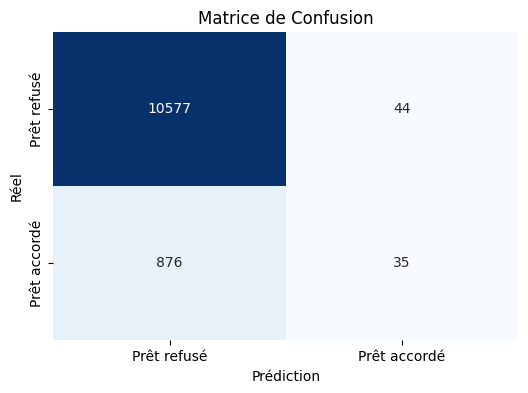

False Positives: 44
False Negatives: 876
Accuracy (top features): 0.9202
AUC ROC: 0.7568
F1 Score: 0.0707
Score Client: -8804


In [90]:
# Modèle X_train total

# . Initialiser les hyperparamètres pour LightGBM
learning_rate = 0.1
n_estimators = 200
max_depth = -1  # Pas de limite de profondeur
random_state = 76
run_name = "LightGBM_Top_Features"

# . Définir un exemple d'entrée pour le modèle
input_example = X_train.iloc[:1]  # Exemple d'une ligne d'entrée (format DataFrame)

# . Entraîner le modèle avec LightGBM et journalisation dans MLflow
with mlflow.start_run(run_name=run_name):
    # Initialiser le modèle LightGBM
    lgbm_classifier_top = LGBMClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=None,  # Les données sont supposées équilibrées
        random_state=random_state
    )
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    lgbm_classifier_top.fit(X_train, Y_train)

    # Prédictions sur l'ensemble de test
    y_pred = lgbm_classifier_top.predict(X_test)  # Classes prédites (0 ou 1)
    y_prob = lgbm_classifier_top.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1 (AUC ROC)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculer les métriques
    false_positives = fp
    false_negatives = fn
    accuracy = accuracy_score(Y_test, y_pred)
    auc_roc = roc_auc_score(Y_test, y_prob)  # AUC ROC
    f1 = f1_score(Y_test, y_pred)  # F1 Score

    # Journaliser les hyperparamètres et métriques dans MLflow
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", false_positives)
    mlflow.log_metric("False Negatives", false_negatives)
    mlflow.log_metric("AUC ROC", auc_roc)
    mlflow.log_metric("F1 Score", f1)

    # Enregistrer le modèle entraîné avec un exemple d'entrée
    mlflow.sklearn.log_model(
        sk_model=lgbm_classifier_top,
        artifact_path="lightgbm_model_top_balanced",
        input_example=input_example
    )

# . Visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt refusé', 'Prêt accordé'],
            yticklabels=['Prêt refusé', 'Prêt accordé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# 11. Afficher les résultats dans la console
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Accuracy (top features): {accuracy:.4f}")
print(f"AUC ROC: {auc_roc:.4f}")
print(f"F1 Score: {f1:.4f}")

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")


### Préparation des données pour Smote

In [91]:
# Liste des colonnes contenant des NaN dans X_train
colonnes_nan = [col for col in X_train.columns if X_train[col].isna().any()]

print("Colonnes contenant des NaN :", colonnes_nan)
print("nombre de colonnes:", len (colonnes_nan))


Colonnes contenant des NaN : ['AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TO

In [92]:
# Nombre de NaN par colonne dans X_train
nan_counts = X_train.isna().sum()

# Colonnes avec au moins un NaN
colonnes_nan = nan_counts[nan_counts > 0].index.tolist()

print("Colonnes contenant des NaN :", colonnes_nan)
print("Nombre de NaN par colonne :", nan_counts[nan_counts > 0])

Colonnes contenant des NaN : ['AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TO

In [93]:
# Nombre de NaN par colonne dans X_train
nan_counts = X_train.isna().sum()

# Calcul du seuil (50% des lignes)
seuil = len(X_train) * 0.5

# Colonnes où les NaN représentent plus de 50% des données
colonnes_nan_50 = nan_counts[nan_counts > seuil].index.tolist()

# Nombre de colonnes où les NaN sont > à 50%
nombre_colonnes_nan_50 = len(colonnes_nan_50)

# Affichage des résultats
print(f"Nombre de colonnes avec plus de 50% de NaN : {nombre_colonnes_nan_50}")
print("Colonnes avec plus de 50% de NaN :", colonnes_nan_50)
print("Nombre de NaN par colonne avec plus de 50% de NaN :", nan_counts[nan_counts > seuil])



Nombre de colonnes avec plus de 50% de NaN : 231
Colonnes avec plus de 50% de NaN : ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'BURO_AMT_ANNUITY_MAX', 'BURO_AMT_ANNUITY_MEAN', 'BURO_MONTHS_BALANCE_MIN_MIN', 'BURO_MONTHS_BALANCE_MAX_MAX', 'BURO_MONTHS_BALANCE_SIZE_MEAN', 'BURO_STATUS_0_MEAN_MEAN', 'BURO_STATUS_1_MEAN_MEAN', 'BURO_STATUS_2_MEAN_ME

In [94]:
# 0. remplacer les NaN par median
X_train = X_train.apply(lambda col: col.fillna(col.median()))

In [95]:
# 1. Initialiser SMOTE
smote = SMOTE(random_state=42)

# 2. Appliquer SMOTE sur l'ensemble d'entraînement
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Total Bins 136779
[LightGBM] [Info] Number of data points in the train set: 63562, number of used features: 715
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/12/23 23:06:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run LightGBM_with_SMOTE at: http://localhost:5000/#/experiments/0/runs/7a8e0aab5ddb48419e3cf34274764f79.
2024/12/23 23:06:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.


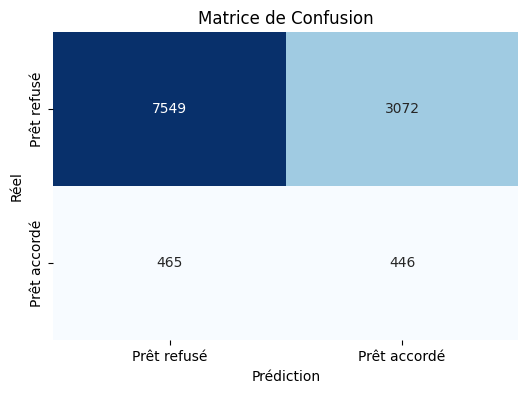

False Positives: 3072
False Negatives: 465
Accuracy (SMOTE): 0.6933
AUC ROC: 0.6512
F1 Score: 0.2014
Score Client: -7722


In [96]:
# Modèle X_train total et smote 



# Initialiser les hyperparamètres pour LightGBM
learning_rate = 0.5
n_estimators = 100
max_depth = -1  # Pas de limite de profondeur
random_state = 76

run_name = "LightGBM_with_SMOTE"

# Définir un exemple d'entrée pour le modèle
input_example = X_train_resampled.iloc[:1]  # Exemple d'une ligne d'entrée (format DataFrame)

# Entraîner le modèle avec LightGBM et journalisation dans MLflow
with mlflow.start_run(run_name=run_name):
    # Initialiser le modèle LightGBM
    lgbm_classifier_top = LGBMClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=None,  # Pas de poids spécifiques, car SMOTE équilibre les données
        random_state=random_state,
        force_col_wise=True  # Forcer l'utilisation du multi-threading par colonne,
    )
    
    # Entraîner le modèle sur les données réséchantillonnées
    lgbm_classifier_top.fit(X_train_resampled, Y_train_resampled)

    # Prédictions sur l'ensemble de test
    #y_pred = lgbm_classifier_top.predict(X_test)  # Classes prédites (0 ou 1)

   
    y_prob = lgbm_classifier_top.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1 (AUC ROC)

    # Appliquer le seuil personnalisé (par exemple 0.35) pour obtenir les prédictions binaires
    seuil_personnalise = 0.5
    y_pred = (y_prob >= seuil_personnalise).astype(int)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculer les métriques
    false_positives = fp
    false_negatives = fn
    accuracy = accuracy_score(Y_test, y_pred)
    auc_roc = roc_auc_score(Y_test, y_prob)  # AUC ROC
    f1 = f1_score(Y_test, y_pred)  # F1 Score

    # Journaliser les hyperparamètres et métriques dans MLflow
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", false_positives)
    mlflow.log_metric("False Negatives", false_negatives)
    mlflow.log_metric("AUC ROC", auc_roc)
    mlflow.log_metric("F1 Score", f1)

    # Enregistrer le modèle entraîné avec un exemple d'entrée
    mlflow.sklearn.log_model(
        sk_model=lgbm_classifier_top,
        artifact_path="lightgbm_model_with_smote",
        input_example=input_example
    )

# Visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt refusé', 'Prêt accordé'],
            yticklabels=['Prêt refusé', 'Prêt accordé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# Afficher les résultats dans la console
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Accuracy (SMOTE): {accuracy:.4f}")
print(f"AUC ROC: {auc_roc:.4f}")
print(f"F1 Score: {f1:.4f}")

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")



                          Feature  Importance
31                   EXT_SOURCE_2          51
32                   EXT_SOURCE_3          38
9                      DAYS_BIRTH          33
11              DAYS_REGISTRATION          32
256           ANNUITY_INCOME_PERC          31
257                  PAYMENT_RATE          30
12                DAYS_ID_PUBLISH          29
30                   EXT_SOURCE_1          24
262          BURO_DAYS_CREDIT_VAR          23
5                      AMT_CREDIT          22
6                     AMT_ANNUITY          22
253            DAYS_EMPLOYED_PERC          22
13                    OWN_CAR_AGE          21
8      REGION_POPULATION_RELATIVE          21
387      PREV_APP_CREDIT_PERC_VAR          19
258                     nan_ratio          19
23        HOUR_APPR_PROCESS_START          19
590    APPROVED_DAYS_DECISION_MAX          19
321        ACTIVE_DAYS_CREDIT_MIN          18
266  BURO_DAYS_CREDIT_UPDATE_MEAN          18
10                  DAYS_EMPLOYED 

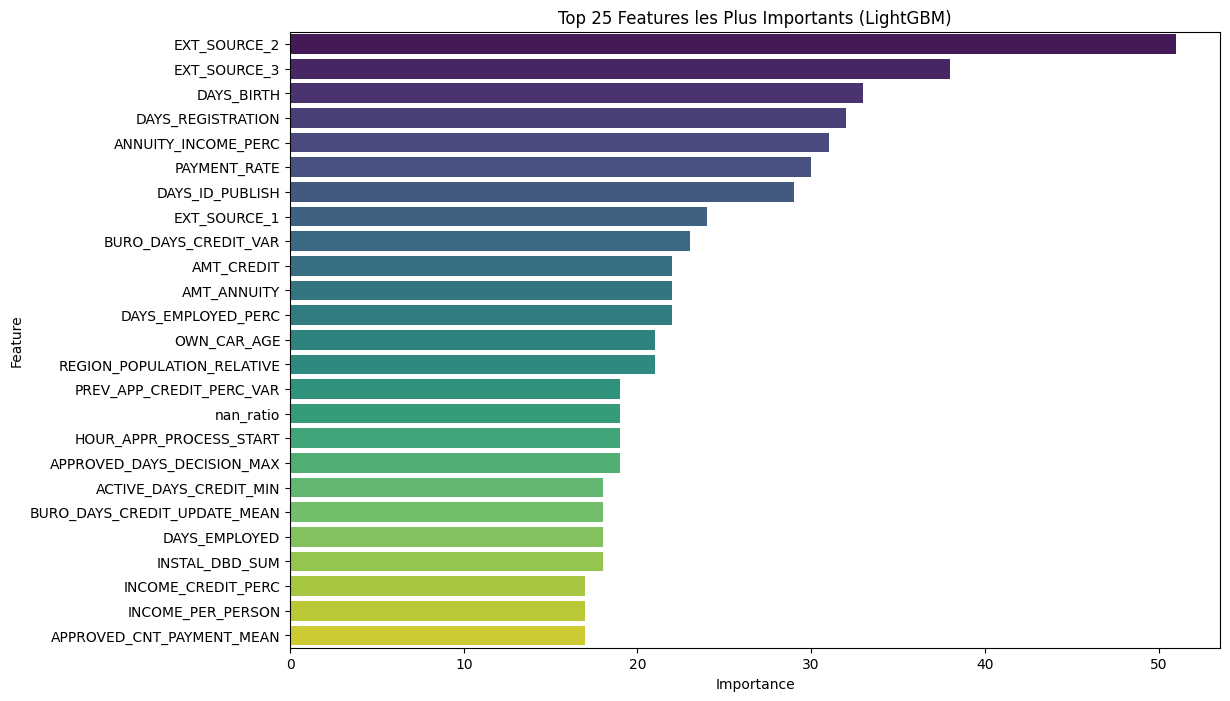

In [97]:
# Définir le nombre de features à sélectionner
top_n = 25  # Modifier cette valeur pour ajuster le nombre de features sélectionnés

# Obtenir l'importance des features
feature_importances = lgbm_classifier_top.feature_importances_

# Associer les noms des features à leur importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,  # Les noms des colonnes d'entrée
    'Importance': feature_importances
})

# Trier les features par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Extraire les `top_n` features les plus importants
top_features = feature_importance_df.head(top_n)

# Afficher les `top_n` features les plus importants dans un tableau
print(top_features)

# Visualiser les `top_n` features les plus importants sous forme de barres
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_features,
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title(f"Top {top_n} Features les Plus Importants (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 63562, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/12/23 23:06:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run LightGBM_with_SMOTE_and_Top_Features at: http://localhost:5000/#/experiments/0/runs/3fa58f9c052f4314b0605ea35c9e69f0.
2024/12/23 23:06:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.


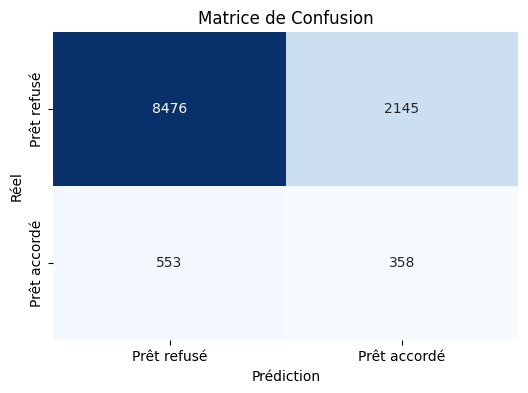

False Positives: 2145
False Negatives: 553
Accuracy (SMOTE + Top Features): 0.7660
AUC ROC: 0.6620
F1 Score: 0.2097
Score Client: -7675


In [98]:
# Relancer le modèle eavec le nombre de features en paramètres:

# Nombre de features à conserver
top_n = 25 # Modifier selon votre choix

# Extraire les noms des top_n features
top_features = feature_importance_df.head(top_n)['Feature'].tolist()

# Filtrer les datasets pour ne garder que les top_n features
X_train_top = X_train_resampled[top_features]
X_test_top = X_test[top_features]

# Initialiser les hyperparamètres pour LightGBM
learning_rate = 0.5
n_estimators = 100
max_depth = -1  # Pas de limite de profondeur
random_state = 76

run_name = "LightGBM_with_SMOTE_and_Top_Features"

# Définir un exemple d'entrée pour le modèle
input_example = X_train_top.iloc[:1]  # Exemple d'une ligne d'entrée (format DataFrame)

# Entraîner le modèle avec LightGBM et journalisation dans MLflow
with mlflow.start_run(run_name=run_name):
    # Initialiser le modèle LightGBM
    lgbm_classifier_top = LGBMClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=None,  # Pas de poids spécifiques, car SMOTE équilibre les données
        random_state=random_state,
        force_col_wise=True  # Forcer l'utilisation du multi-threading par colonne,
    )
    
    # Entraîner le modèle sur les données réséchantillonnées
    lgbm_classifier_top.fit(X_train_top, Y_train_resampled)

    # Prédictions sur l'ensemble de test
    y_prob = lgbm_classifier_top.predict_proba(X_test_top)[:, 1]  # Probabilités pour la classe 1 (AUC ROC)

    # Appliquer le seuil personnalisé (par exemple 0.5) pour obtenir les prédictions binaires
    seuil_personnalise = 0.5
    y_pred = (y_prob >= seuil_personnalise).astype(int)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculer les métriques
    false_positives = fp
    false_negatives = fn
    accuracy = accuracy_score(Y_test, y_pred)
    auc_roc = roc_auc_score(Y_test, y_prob)  # AUC ROC
    f1 = f1_score(Y_test, y_pred)  # F1 Score

    # Journaliser les hyperparamètres et métriques dans MLflow
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("top_n_features", top_n)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", false_positives)
    mlflow.log_metric("False Negatives", false_negatives)
    mlflow.log_metric("AUC ROC", auc_roc)
    mlflow.log_metric("F1 Score", f1)

    # Enregistrer le modèle entraîné avec un exemple d'entrée
    mlflow.sklearn.log_model(
        sk_model=lgbm_classifier_top,
        artifact_path="lightgbm_model_with_smote_and_top_features",
        input_example=input_example
    )

# Visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt refusé', 'Prêt accordé'],
            yticklabels=['Prêt refusé', 'Prêt accordé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

# Afficher les résultats dans la console
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Accuracy (SMOTE + Top Features): {accuracy:.4f}")
print(f"AUC ROC: {auc_roc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculer et afficher le score client
client_score = -(fp + 10 * fn)  # coût d’un FN est supérieur au coût d’un FP
print(f"Score Client: {client_score}")


L'augmentation des features n'augmente significativement pas la qaulité du modèle

In [99]:
# Recherche meilleurs 25 features avec REF


# Définir le classifieur LightGBM
lgbm_classifier = LGBMClassifier(random_state=76)

# Exclure la feature 'nan_ratio' du DataFrame
X_train_resampled_without_nan_ratio = X_train_resampled.drop(columns=['nan_ratio'])

rfe = RFE(estimator=lgbm_classifier, n_features_to_select=25, step=30)
rfe.fit(X_train_resampled_without_nan_ratio, Y_train_resampled)

print("RFE terminé avec succès.")

[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.237541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136524
[LightGBM] [Info] Number of data points in the train set: 63562, number of used features: 714
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 133578
[LightGBM] [Info] Number of data points in the train set: 63562, number of used features: 699
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Auto-choosing col-wise mult

In [100]:
selected_features = X_train_resampled_without_nan_ratio.columns[rfe.support_]
print(f"Features sélectionnées : {selected_features}")

Features sélectionnées : Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NONLIVINGAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PAYMENT_RATE', 'BURO_AMT_CREDIT_SUM_SUM',
       'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'PREV_CNT_PAYMENT_MEAN',
       'PREV_NAME_CLIENT_TYPE_New_MEAN', 'APPROVED_APP_CREDIT_PERC_MIN',
       'APPROVED_RATE_DOWN_PAYMENT_MIN', 'POS_MONTHS_BALANCE_MAX',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MAX',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_SUM',
       'CC_AMT_DRAWINGS_ATM_CURRENT_SUM'],
      dtype='object')


In [101]:
X_train_reduced = rfe.transform(X_train_resampled_without_nan_ratio)

# Exclure la feature 'nan_ratio' du DataFrame
X_test_without_nan_ratio = X_test.drop(columns=['nan_ratio'])

X_test_reduced = rfe.transform(X_test_without_nan_ratio)


In [102]:
X_train_reduced.shape


(63562, 25)

In [103]:
X_test_reduced.shape

(11532, 25)

### RandomizeSearchCV

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[LightGBM] [Info] Number of positive: 31781, number of negative: 31781
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 63562, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Meilleurs paramètres : {'subsample': 0.4, 'objective': 'binary', 'n_jobs': -1, 'n_estimators': 150, 'min_child_samples': 500, 'max_depth': 25, 'learning_rate': np.float64(0.05), 'colsample_bytree': 0.5, 'class_weight': 'balanced'}
Accuracy: 0.7722
AUC ROC: 0.6780
Custom Metric (FP + FN Weighted): -7532.0000
False Positives: 2082
False Negatives: 545
Score Client: -7532


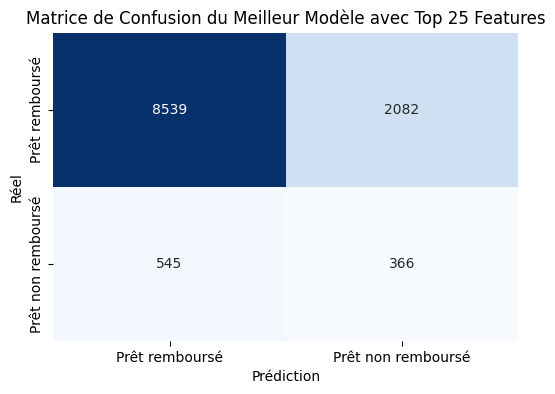

In [104]:
# score personnalisé avec x-train_reduced

from sklearn.metrics import make_scorer



# Calculer le score pondéré
def custom_score(y_true, y_pred):
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    score=-(10*fn+fp)
    return score

# Convertir la fonction en scorer pour RandomizedSearchCV
custom_scorer = make_scorer(custom_score, greater_is_better=False)



# Définir le classifieur LightGBM
lgbm_classifier = LGBMClassifier(random_state=76)

# Paramètres à tester
param_dist = {
    'learning_rate': np.linspace(0.05, 0.7, 5),  # Plage réduite pour le taux d'apprentissage
    'n_estimators': [150,  200],  # Différents nombres d'arbres
    'max_depth': [10,25, 50],  # Tester plus de valeurs pour max_depth
    'min_child_samples': [50,300,500],  # Ajuster plus de valeurs pour min_child_samples
    'subsample': [0.4],  # Tester davantage de fractions d'échantillons
    'colsample_bytree': [0.5],# Tester davantage de fractions de colonnes
    'class_weight': ['balanced'],
    'objective': ['binary'],
    'n_jobs': [-1]
}

# Initialiser RandomizedSearchCV avec le scorer personnalisé
random_search = RandomizedSearchCV(
    estimator=lgbm_classifier,
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations
    cv=4,  # Validation croisée
    scoring=custom_scorer,  # Utiliser le score personnalisé
    n_jobs=-1,  # Utiliser tous les cœurs
    verbose=3,  # Afficher les logs
    random_state=76
)

# Entraîner le modèle avec RandomizedSearchCV sur les données filtrées avec `top_n` features
random_search.fit(X_train_reduced, Y_train_resampled)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres : {random_search.best_params_}")

# Meilleur modèle
best_model = random_search.best_estimator_

# Prédictions avec le meilleur modèle
y_prob = best_model.predict_proba(X_test_reduced)[:, 1]

# Appliquer le seuil personnalisé (par exemple 0.5) pour obtenir les prédictions binaires
seuil_personnalise = 0.30
y_pred = (y_prob >= seuil_personnalise).astype(int)

# Calculer les métriques
accuracy = accuracy_score(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test, y_prob)
custom_metric = custom_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()


# Afficher les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC ROC: {auc_roc:.4f}")
print(f"Custom Metric (FP + FN Weighted): {custom_metric:.4f}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

client_score = -(fp +  10*fn)  # coût d’un FN est  supérieur au coût d’un FP
print(f"Score Client: {client_score}")

# Visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Prêt remboursé', 'Prêt non remboursé'],
            yticklabels=['Prêt remboursé', 'Prêt non remboursé'])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title(f"Matrice de Confusion du Meilleur Modèle avec Top {top_n} Features")
plt.show()


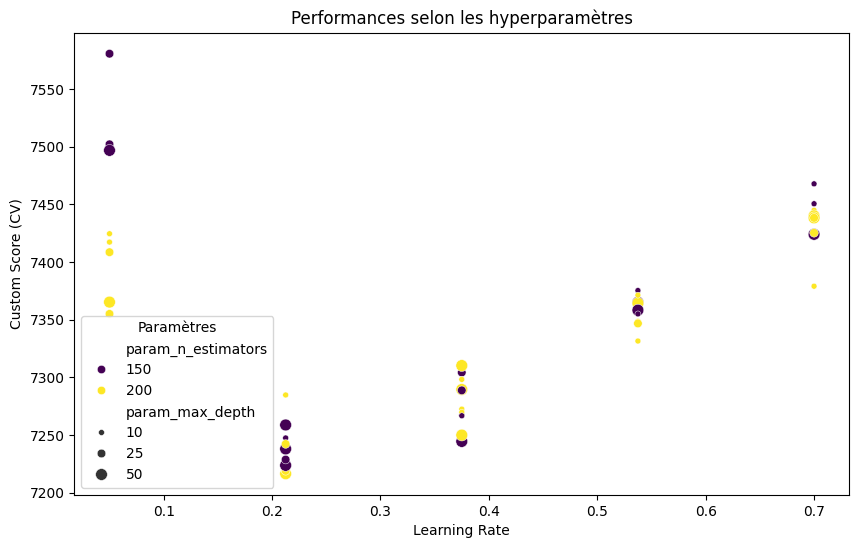

In [105]:
# Récupérer les résultats de RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)

# Visualiser les scores des différentes configurations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x="param_learning_rate", y="mean_test_score", hue="param_n_estimators", size="param_max_depth", palette="viridis")
plt.title("Performances selon les hyperparamètres")
plt.xlabel("Learning Rate")
plt.ylabel("Custom Score (CV)")
plt.legend(title="Paramètres")
plt.show()


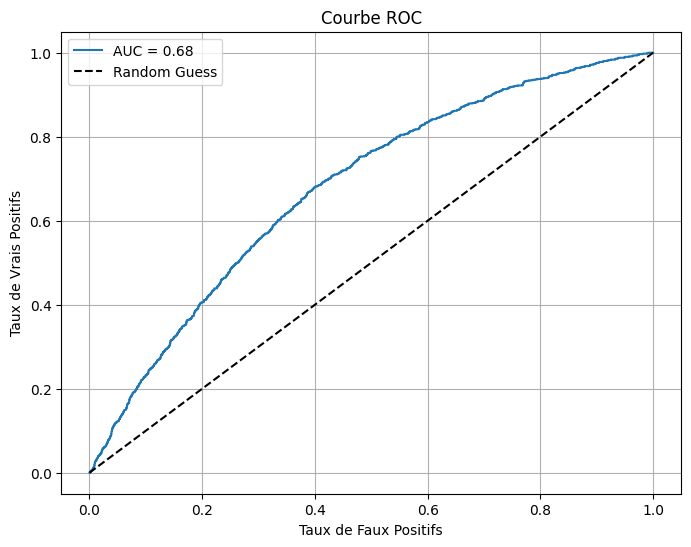

In [106]:

# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend(loc="best")
plt.grid()
plt.show()


### Sauvegarde fichier CSV pour export modèle

In [107]:
# Afficher tous les hyperparamètres du meilleur modèle
best_params = random_search.best_estimator_.get_params()
print("Hyperparamètres du meilleur modèle :")
for param, value in best_params.items():
    print(f"{param}: {value}")



Hyperparamètres du meilleur modèle :
boosting_type: gbdt
class_weight: balanced
colsample_bytree: 0.5
importance_type: split
learning_rate: 0.05
max_depth: 25
min_child_samples: 500
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 150
n_jobs: -1
num_leaves: 31
objective: binary
random_state: 76
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 0.4
subsample_for_bin: 200000
subsample_freq: 0


In [108]:
import json

# Récupérer les hyperparamètres du meilleur modèle
best_params = random_search.best_estimator_.get_params()

# Chemin du fichier pour sauvegarder les paramètres
file_path = "best_model_params.json"

# Sauvegarder les hyperparamètres dans un fichier JSON
with open(file_path, "w") as json_file:
    json.dump(best_params, json_file, indent=4)

print(f"Hyperparamètres sauvegardés dans {file_path}")


Hyperparamètres sauvegardés dans best_model_params.json


In [128]:

# Exclure la feature 'nan_ratio' du DataFrame
X_train_nan_ratio = X_train_resampled.drop(columns=['nan_ratio'])

# Récupérer les colonnes sélectionnées par RFE
selected_features = X_train_nan_ratio.columns[rfe.support_]

# Vérifier si des colonnes ont été sélectionnées
if selected_features.empty:
    raise ValueError("Aucune caractéristique n'a été sélectionnée par RFE.")

# Sauvegarder les noms des colonnes sélectionnées dans un fichier CSV

selected_features_list = selected_features.tolist()
import csv
with open("selected_features.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(selected_features_list)  # Une seule ligne contenant toutes les colonnes
print("Les caractéristiques sélectionnées ont été sauvegardées dans 'selected_features.csv'.")

# Filtrer X_train avec les colonnes sélectionnées
X_train_selected = X_train[selected_features]

# Sauvegarder le DataFrame avec les colonnes sélectionnées et la cible
# Sauvegarder X_train_selected dans le répertoire "artifacts"
file_path = os.path.join("artifacts", "X_train_selected.csv")

X_train_selected.to_csv(file_path, index=False)
print("X_train a été sauvegardés dans 'X_train_selected.csv'.")


# Ajouter la colonne cible à X_train sélectionné
X_train_selected_with_target = X_train_selected.copy()
X_train_selected_with_target["Target"] = Y_train.values  # Assurer la compatibilité des index

# Sauvegarder le DataFrame avec les colonnes sélectionnées et la cible
file_path = os.path.join("artifacts", "X_train_selected_with_target.csv")

X_train_selected_with_target.to_csv(file_path, index=False)
print("X_train et Target ont été sauvegardés dans 'X_train_selected_with_target.csv'.")




Les caractéristiques sélectionnées ont été sauvegardées dans 'selected_features.csv'.
X_train a été sauvegardés dans 'X_train_selected.csv'.
X_train et Target ont été sauvegardés dans 'X_train_selected_with_target.csv'.


In [110]:
X_train_selected.head()

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,PREV_CNT_PAYMENT_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,APPROVED_APP_CREDIT_PERC_MIN,APPROVED_RATE_DOWN_PAYMENT_MIN,POS_MONTHS_BALANCE_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_SUM,CC_AMT_DRAWINGS_ATM_CURRENT_SUM
69161,0.807282,1.227786,0.876330,-0.507425,2.004021,-0.167631,-0.062693,0.041221,-0.242705,-0.745420,...,-0.380817,-0.284094,0.927479,0.000000,0.514334,-0.162200,-0.137094,-0.363954,-0.548217,-0.376973
257670,-0.577534,0.438368,0.920806,-0.256271,2.004021,-0.167631,1.926421,0.673895,-0.340225,0.703749,...,0.710048,-0.649912,0.938086,0.000000,0.407087,4.114493,-0.053971,-0.339896,2.026218,-0.376973
296795,2.192098,1.394148,-0.164587,-0.256271,2.004021,2.028534,-0.062693,0.041221,-0.950301,-1.671368,...,-0.573490,-0.649912,0.000000,0.099998,-0.665380,0.372386,-0.164801,-0.359093,-0.096086,-0.287855
137612,-0.577534,-0.679878,0.363997,-0.256271,-0.498997,-0.167631,-0.062693,0.041221,-1.047524,1.270443,...,-0.777496,-0.430421,0.938086,0.000000,0.567957,-0.162200,-0.164801,1.093485,-0.146115,-0.376973
75749,-0.577534,-0.369611,0.394361,1.334371,-0.498997,-0.167631,1.926421,0.041221,0.236767,0.434195,...,-0.460153,-0.040215,0.904471,0.000000,0.246217,-0.162200,-0.164801,0.059405,-0.473581,-0.376973


In [113]:
print(selected_features)

Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NONLIVINGAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PAYMENT_RATE', 'BURO_AMT_CREDIT_SUM_SUM',
       'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'PREV_CNT_PAYMENT_MEAN',
       'PREV_NAME_CLIENT_TYPE_New_MEAN', 'APPROVED_APP_CREDIT_PERC_MIN',
       'APPROVED_RATE_DOWN_PAYMENT_MIN', 'POS_MONTHS_BALANCE_MAX',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MAX',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_SUM',
       'CC_AMT_DRAWINGS_ATM_CURRENT_SUM'],
      dtype='object')


In [115]:
# Ajouter "SK_ID_CURR" et le positionner en premier
selected_features = ['SK_ID_CURR'] + [feature for feature in selected_features if feature != 'SK_ID_CURR']


In [117]:
print(selected_features)

['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NONLIVINGAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'PAYMENT_RATE', 'BURO_AMT_CREDIT_SUM_SUM', 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'PREV_CNT_PAYMENT_MEAN', 'PREV_NAME_CLIENT_TYPE_New_MEAN', 'APPROVED_APP_CREDIT_PERC_MIN', 'APPROVED_RATE_DOWN_PAYMENT_MIN', 'POS_MONTHS_BALANCE_MAX', 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MAX', 'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_SUM', 'CC_AMT_DRAWINGS_ATM_CURRENT_SUM']


In [118]:
# Réduction de df_data2_sample aux colonnes spécifiées dans selected_features
df_data2_sample = df_data2_sample[selected_features]

In [119]:
df_data2_sample.shape

(46126, 26)

In [122]:
# Sauvegarde des 15 premières lignes dans un fichier CSV

file_path = os.path.join("artifacts", "testclient.csv")

df_data2_sample.head(15).to_csv(file_path, index=False)